In [1]:
import os
import sys
sys.path.append(os.path.expanduser("~/LES-utils/"))
import xarray as xr
import numpy as np
from LESutils import load_stats
from matplotlib import pyplot as plt

In [2]:
figdir = "/home/bgreene/CBL-DOE/figures/timestep_test/"

# Define function that plots percent difference of important parameters for given case

In [3]:
def pdif(sref, scomp, var):
    return 100. * abs(sref[var]-scomp[var])/abs(sref[var])

In [4]:
def plot_pdif(simdir, simname, tall, fdir_save=None):
    sall = []
    for jt, tt in enumerate(tall):
        s = load_stats(f"{simdir}{simname}/mean_stats_xyt_{tt}.nc")
        s.attrs["lab"] = tt
        sall.append(s)

    fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(18, 15),
                           constrained_layout=True)

    sref = sall[0]
    for s in sall[1:]:
        # row 1: u, v, theta, q
        # u
        ax[0,0].plot(pdif(sref, s, "u_mean"), s.z/sref.h, lw=2, label=s.lab)
        # v
        ax[0,1].plot(pdif(sref, s, "v_mean"), s.z/sref.h, lw=2, label=s.lab)
        # theta
        ax[0,2].plot(pdif(sref, s, "theta_mean"), s.z/sref.h, lw=2, label=s.lab)
        # q
        ax[0,3].plot(pdif(sref, s, "q_mean"), s.z/sref.h, lw=2, label=s.lab)
        # row 2: u'w', v'w', t'w', q'w'
        # u'w'
        ax[1,0].plot(pdif(sref, s, "ustar2"), s.z/sref.h, lw=2, label=s.lab)
        # v'w'
        ax[1,1].plot(pdif(sref, s, "tw_cov_tot"), s.z/sref.h, lw=2, label=s.lab)
        # t'w'
        ax[1,2].plot(pdif(sref, s, "qw_cov_tot"), s.z/sref.h, lw=2, label=s.lab)
        # q'w'
        ax[1,3].plot(pdif(sref, s, "tq_cov_res"), s.z/sref.h, lw=2, label=s.lab)
        # row 3: u'u', w'w', t't', q'q'
        # u'u'
        ax[2,0].plot(pdif(sref, s, "u_var_rot"), s.z/sref.h, lw=2, label=s.lab)
        # w'w'
        ax[2,1].plot(pdif(sref, s, "w_var"), s.z/sref.h, lw=2, label=s.lab)
        # t't'
        ax[2,2].plot(pdif(sref, s, "theta_var"), s.z/sref.h, lw=2, label=s.lab)
        # q'q'
        ax[2,3].plot(pdif(sref, s, "q_var"), s.z/sref.h, lw=2, label=s.lab)
    # add legend
    ax[0,0].legend()
    # y axis limits
    ax[0,0].set_ylim([0, 1.2])
    # figure labels
    [iax.set_ylabel("z [m]") for iax in ax[:,0]]
    # axis labels
    ax[0,0].set_xlabel(r"$u$ [%]")
    ax[0,1].set_xlabel(r"$v$ [%]")
    ax[0,2].set_xlabel(r"$\theta$ [%]")
    ax[0,3].set_xlabel(r"$q$ [%]")
    ax[1,0].set_xlabel(r"$u_*^2$ [%]")
    ax[1,1].set_xlabel(r"$\overline{\theta'w'}$ [%]")
    ax[1,2].set_xlabel(r"$\overline{q'w'}$ [%]")    
    ax[1,3].set_xlabel(r"$\overline{\theta'q'}$ [%]")
    ax[2,0].set_xlabel(r"$\overline{u'u'}$ [%]")
    ax[2,1].set_xlabel(r"$\overline{w'w'}$ [%]")
    ax[2,2].set_xlabel(r"$\overline{\theta'\theta'}$ [%]")
    ax[2,3].set_xlabel(r"$\overline{q'q'}$ [%]")

    fig.suptitle(simname)

    if fdir_save is not None:
        fname = f"{fdir_save}mean_pdiff_{simname}.pdf"
        fig.savefig(fname)

    return fig, ax

In [5]:
def plot_sims(simdir, simname, tall, fdir_save=None):
    sall = []
    for jt, tt in enumerate(tall):
        s = load_stats(f"{simdir}{simname}/mean_stats_xyt_{tt}.nc")
        s.attrs["lab"] = tt
        sall.append(s)

    fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(18, 15),
                           constrained_layout=True)

    for s in sall:
        # row 1: u, v, theta, q
        # u
        ax[0,0].plot(s.u_mean, s.z/s.h, lw=2, label=s.lab)
        # v
        ax[0,1].plot(s.v_mean, s.z/s.h, lw=2, label=s.lab)
        # theta
        ax[0,2].plot(s.theta_mean, s.z/s.h, lw=2, label=s.lab)
        # q
        ax[0,3].plot(s.q_mean, s.z/s.h, lw=2, label=s.lab)
        # row 2: u'w', v'w', t'w', q'w'
        # u'w'
        ax[1,0].plot(s.ustar2, s.z/s.h, lw=2, label=s.lab)
        # v'w'
        ax[1,1].plot(s.tw_cov_tot, s.z/s.h, lw=2, label=s.lab)
        # t'w'
        ax[1,2].plot(s.qw_cov_tot, s.z/s.h, lw=2, label=s.lab)
        # q'w'
        ax[1,3].plot(s.tq_cov_res, s.z/s.h, lw=2, label=s.lab)
        # row 3: u'u', w'w', t't', q'q'
        # u'u'
        ax[2,0].plot(s.u_var_rot, s.z/s.h, lw=2, label=s.lab)
        # w'w'
        ax[2,1].plot(s.w_var, s.z/s.h, lw=2, label=s.lab)
        # t't'
        ax[2,2].plot(s.theta_var, s.z/s.h, lw=2, label=s.lab)
        # q'q'
        ax[2,3].plot(s.q_var, s.z/s.h, lw=2, label=s.lab)
    # add legend
    ax[0,0].legend()
    # y axis limits
    ax[0,0].set_ylim([0, 1.2])
    # figure labels
    [iax.set_ylabel("z [m]") for iax in ax[:,0]]
    # axis labels
    ax[0,0].set_xlabel(r"$u$")
    ax[0,1].set_xlabel(r"$v$")
    ax[0,2].set_xlabel(r"$\theta$")
    ax[0,3].set_xlabel(r"$q$")
    ax[1,0].set_xlabel(r"$u_*^2$")
    ax[1,1].set_xlabel(r"$\overline{\theta'w'}$")
    ax[1,2].set_xlabel(r"$\overline{q'w'}$")    
    ax[1,3].set_xlabel(r"$\overline{\theta'q'}$")
    ax[2,0].set_xlabel(r"$\overline{u'u'}$")
    ax[2,1].set_xlabel(r"$\overline{w'w'}$")
    ax[2,2].set_xlabel(r"$\overline{\theta'\theta'}$")
    ax[2,3].set_xlabel(r"$\overline{q'q'}$")

    fig.suptitle(simname)

    if fdir_save is not None:
        fname = f"{fdir_save}mean_{simname}.pdf"
        fig.savefig(fname)

    return fig, ax

In [6]:
def plot_spec(d0, sim, t, var, scal1, scal2, vmin, vmax, fdir_save=None):
    specall, sall = [], []
    for tt in t:
        s = load_stats(f"{d0}{sim}/mean_stats_xyt_{tt}.nc")
        s.attrs["dt"] = tt
        sall.append(s)
        E = xr.load_dataset(f"{d0}{sim}/spectrogram_rot_{tt}.nc")
        specall.append(E)

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(15, 3),
                           constrained_layout=True)
    
    for js, (s, E) in enumerate(zip(sall, specall)):
        cax = ax[js].contour(E.z/s.h, 1/E.freq_x/s.h, 
                             E.freq_x*E[var]/s[scal1]/s[scal2],
                            levels=np.linspace(vmin, vmax, 21), extend="both")
        ax[js].set_title(s.dt)

    ax[0].set_xscale("log")
    ax[0].set_yscale("log")

    ax[0].set_xlim([4e-3, 1e0])

    ax[0].set_ylabel(r"$\lambda_x/z_i$")
    [iax.set_xlabel("$z/z_i$") for iax in ax]

    fig.colorbar(cax, ax=ax[:], location="right", ticks=np.linspace(vmin, vmax, 3), pad=0.02,
                 label=var)
    
    fig.suptitle(sim)

    if fdir_save is not None:
        fname = f"{fdir_save}spec_{var}_{sim}.pdf"
        fig.savefig(fname)

    return fig, ax

In [7]:
def plot_L(d0, sim, t, fdir_save=None):
    Lall, sall = [], []
    for tt in t:
        s = load_stats(f"{d0}{sim}/mean_stats_xyt_{tt}.nc")
        s.attrs["dt"] = tt
        sall.append(s)
        L = xr.load_dataset(f"{d0}{sim}/lengthscale_{tt}.nc")
        Lall.append(L)

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(15, 5),
                            constrained_layout=True)

    for js, (s, L) in enumerate(zip(sall, Lall)):
        # u
        ax[0].plot(L.u_rot, L.z/s.h, label=s.dt, lw=3)
        # w
        ax[1].plot(L.w, L.z/s.h, label=s.dt, lw=3)
        # t
        ax[2].plot(L.theta, L.z/s.h, label=s.dt, lw=3)
        # q
        ax[3].plot(L.q, L.z/s.h, label=s.dt, lw=3)

    ax[0].set_ylim([0, 1.2])

    ax[1].legend()

    ax[0].set_ylabel("$z/z_i$")
    ax[0].set_xlabel(r"$\mathcal{L}_u$")
    ax[1].set_xlabel(r"$\mathcal{L}_w$")
    ax[2].set_xlabel(r"$\mathcal{L}_\theta$")
    ax[3].set_xlabel(r"$\mathcal{L}_q$")

    fig.suptitle(sim)

    if fdir_save is not None:
        fname = f"{fdir_save}lengthscale_{sim}.pdf"
        fig.savefig(fname)

    return fig, ax

# Case 1: u15_tw03_qw01_dq-08

Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_10000.nc


(-0.1, 2.0)

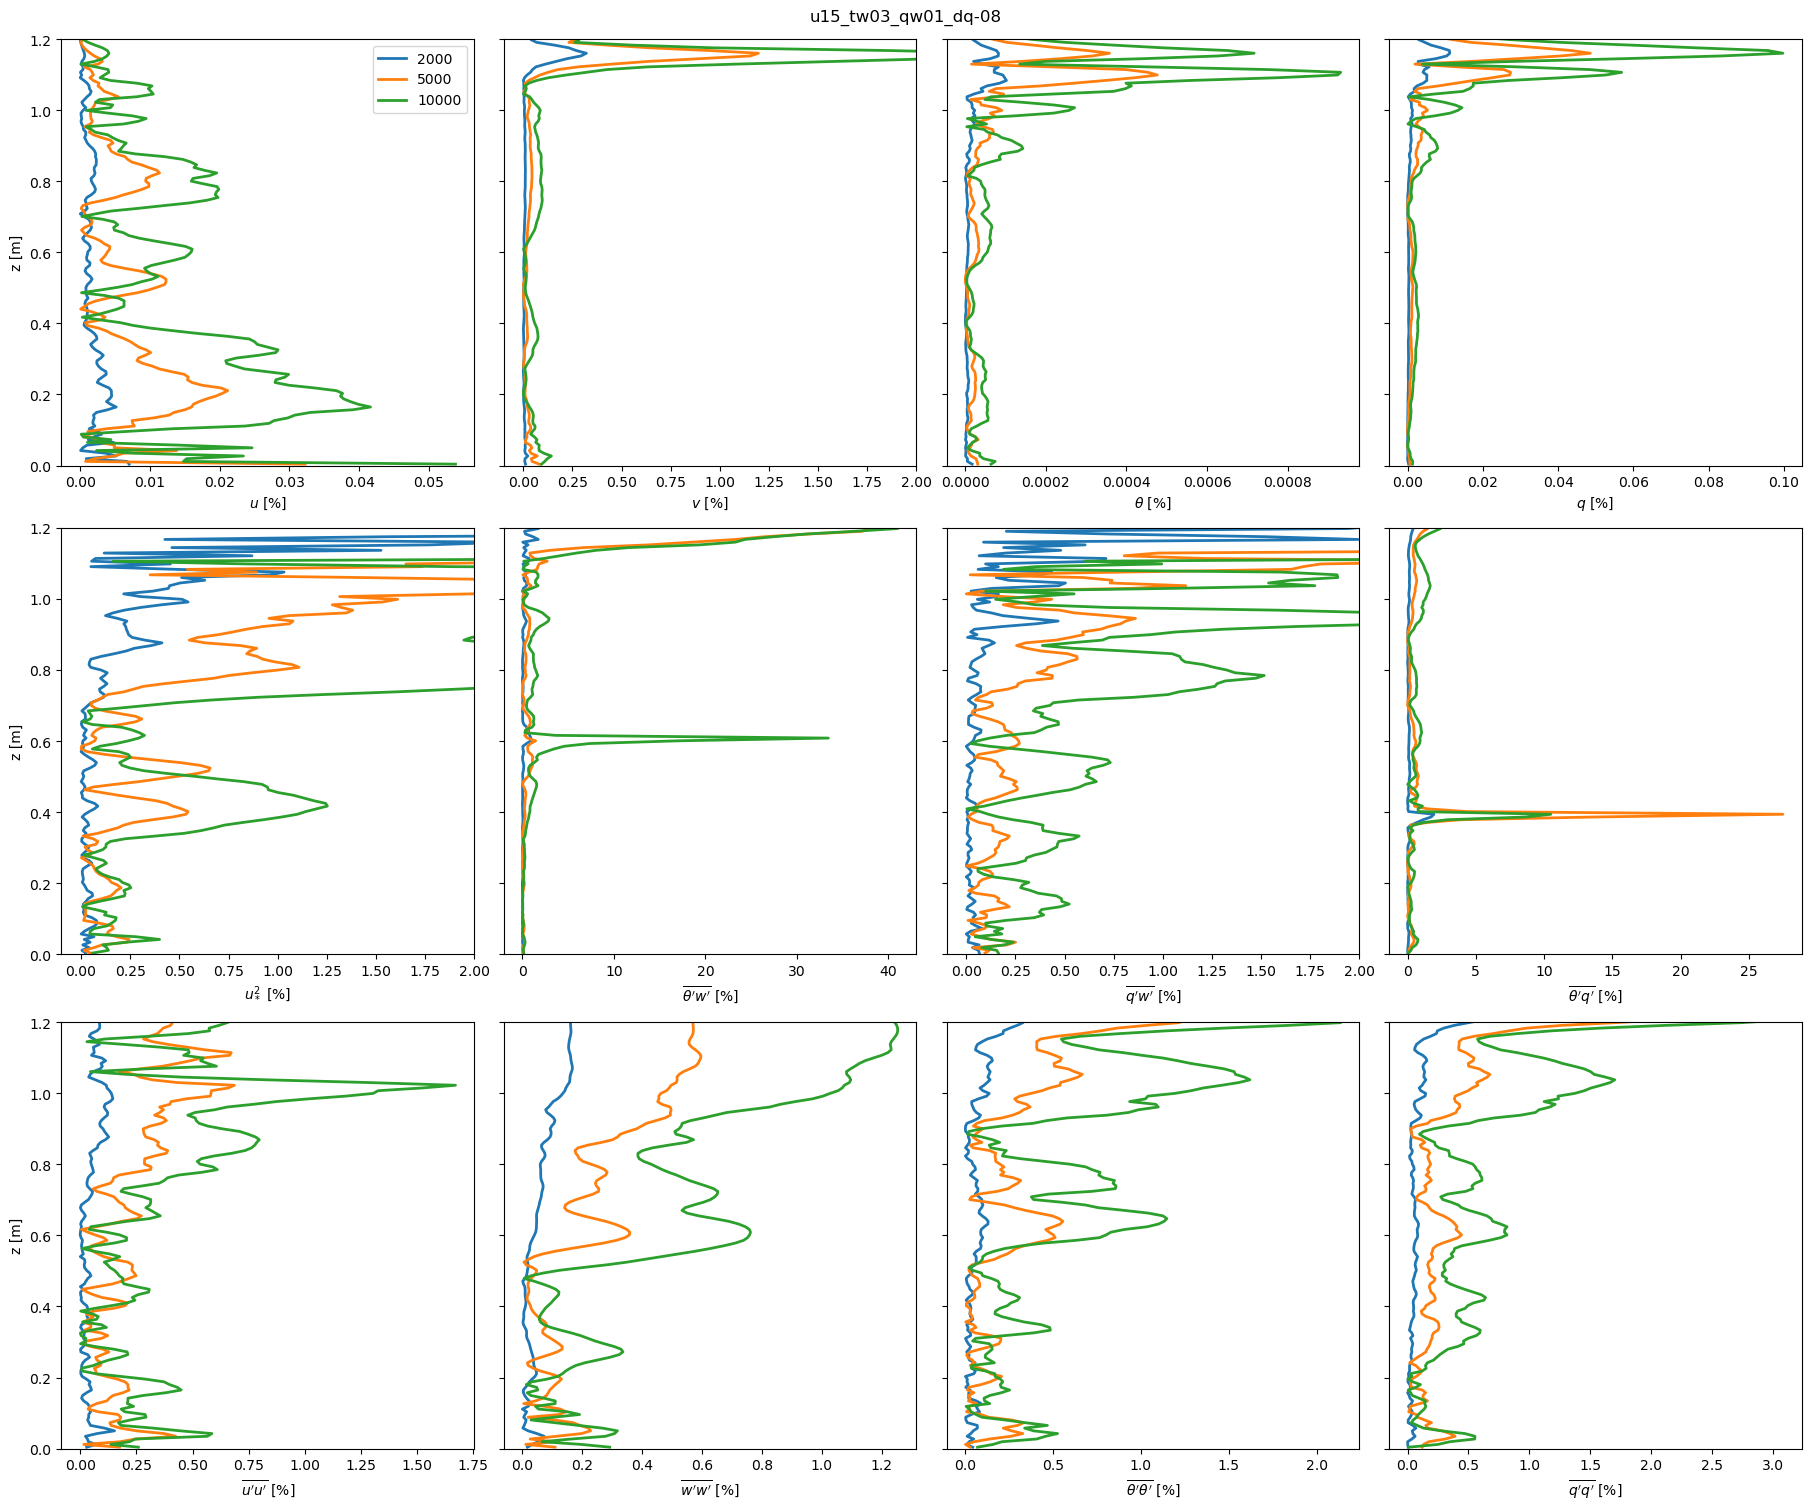

In [8]:
d0 = "/home/bgreene/simulations/CBL/"
sim = "u15_tw03_qw01_dq-08"
t = ["1000", "2000", "5000", "10000"]

fig, ax = plot_pdif(d0, sim, t, figdir)
# axis limits
ax[0,1].set_xlim([-0.1, 2])
ax[1,0].set_xlim([-0.1, 2])
ax[1,2].set_xlim([-0.1, 2])

Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_10000.nc


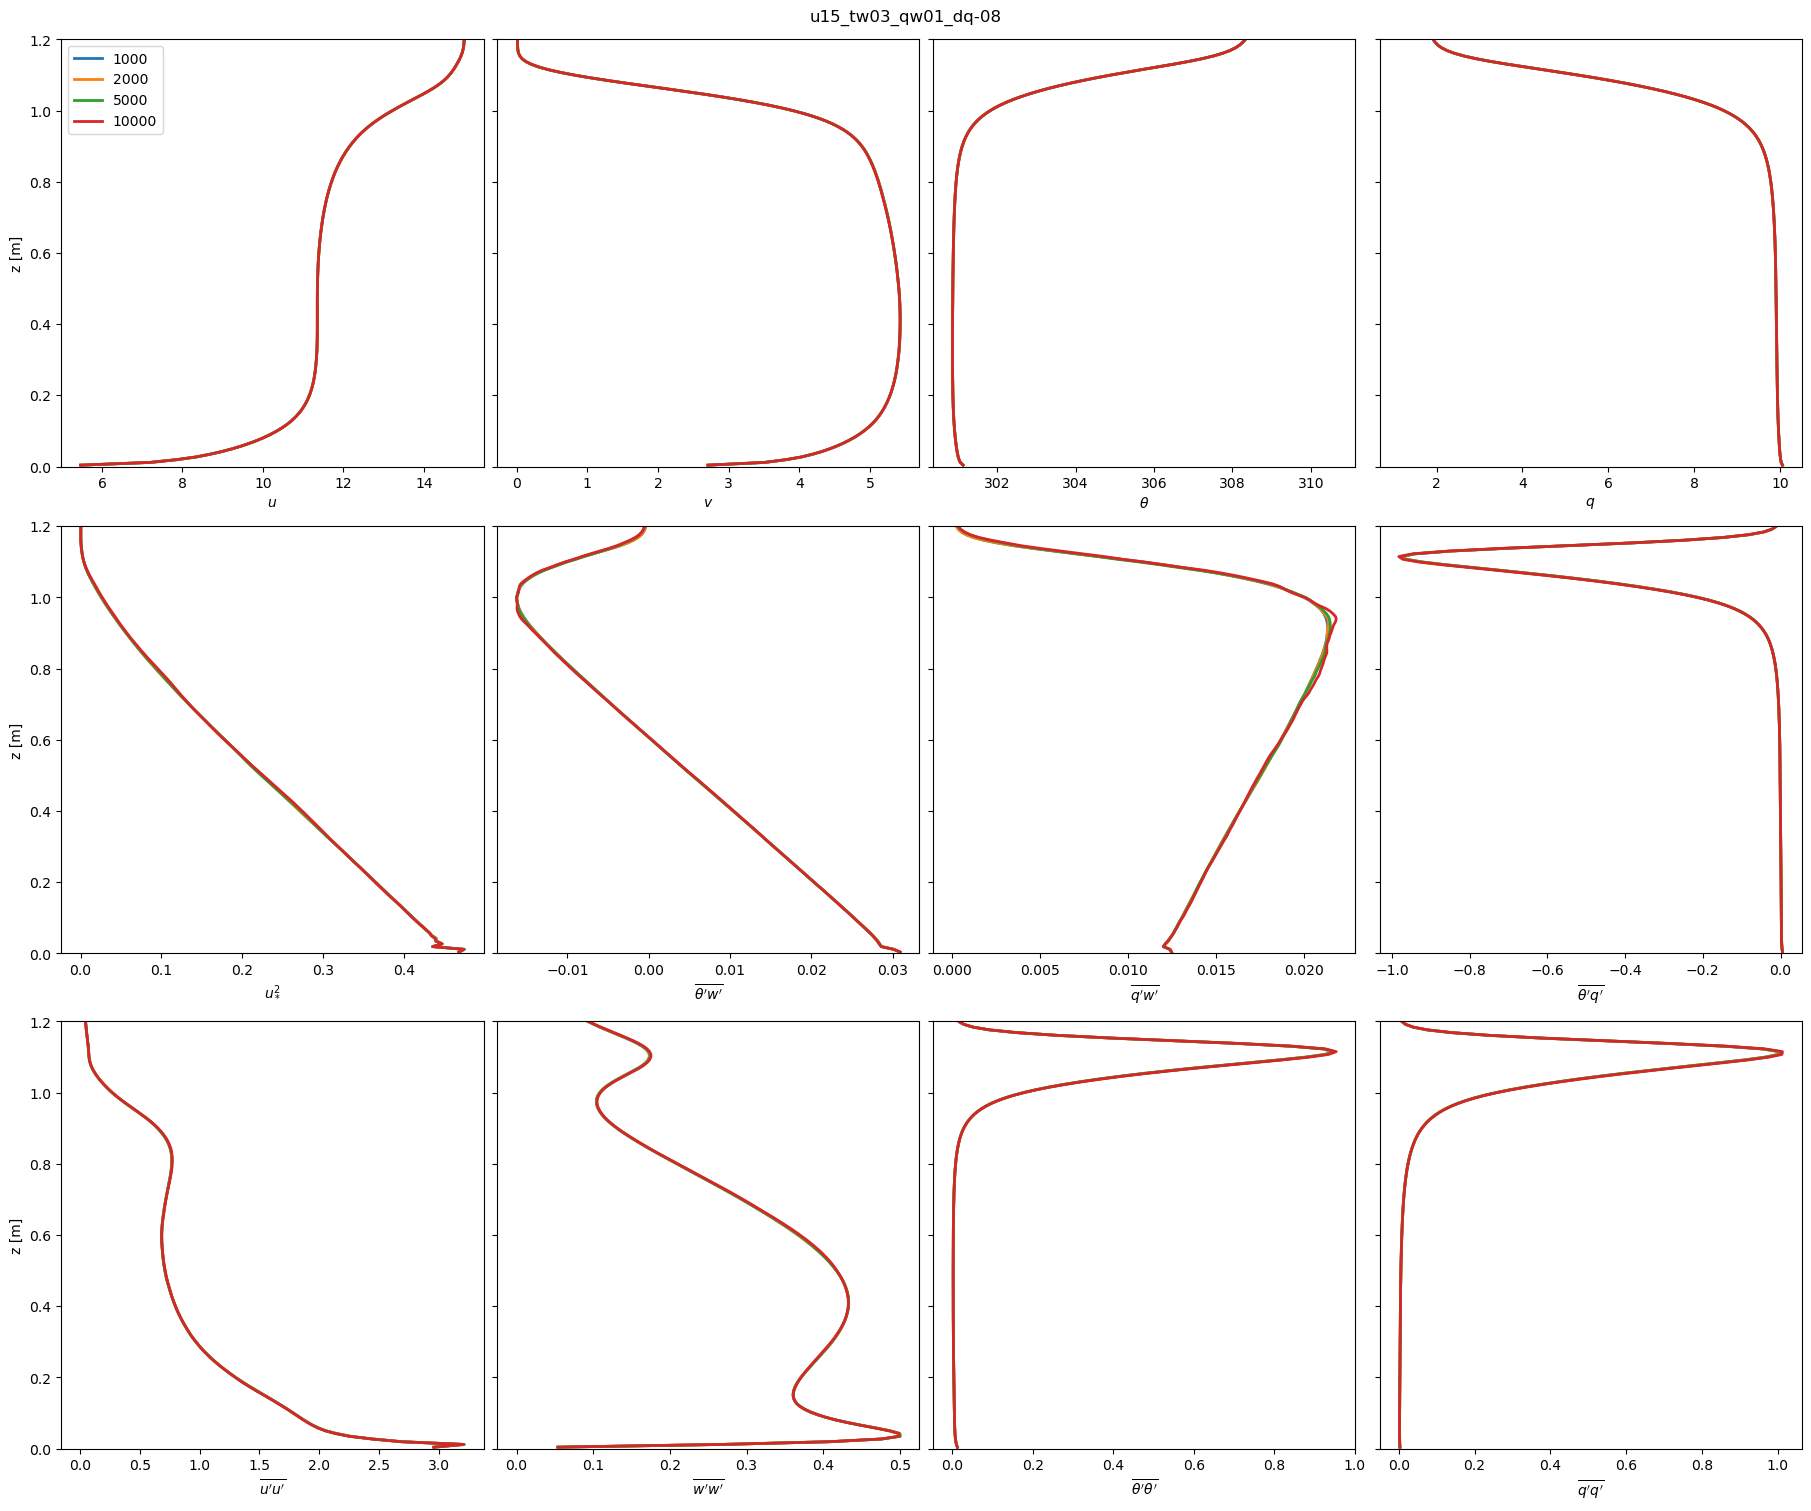

In [9]:
_, _ = plot_sims(d0, sim, t, figdir)

# ax[0,0].set_ylim([0.6, 1.2])

## Spectrograms

Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/C

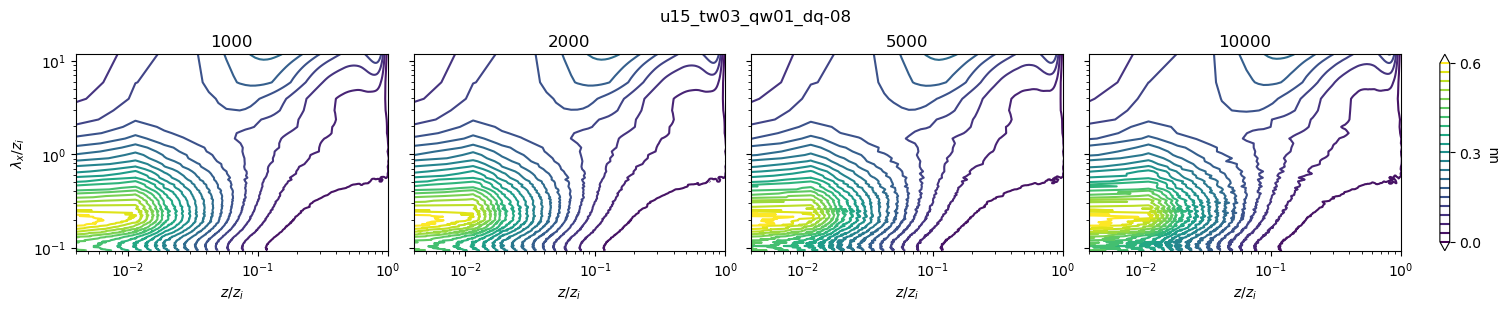

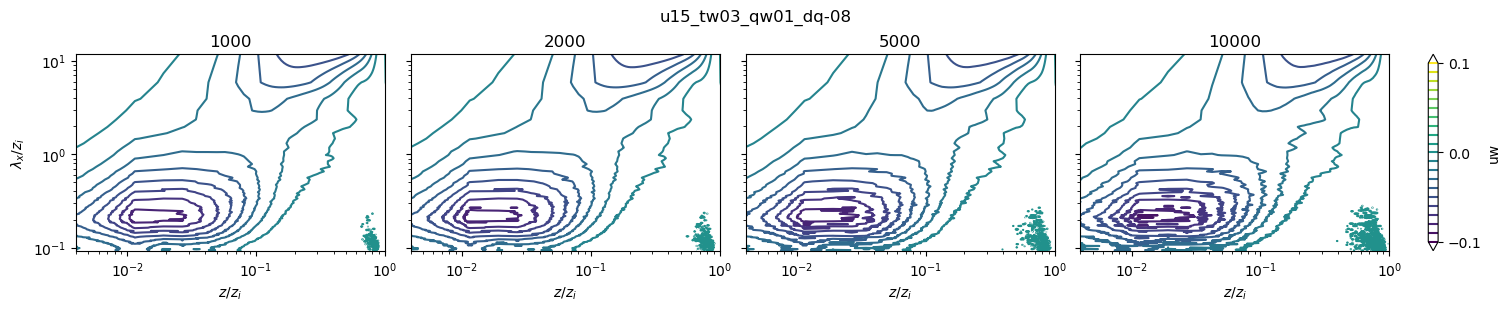

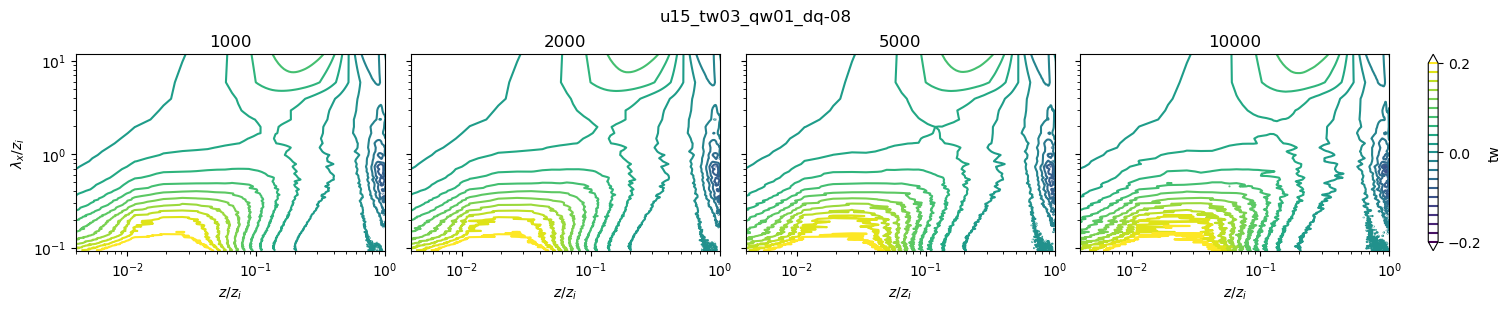

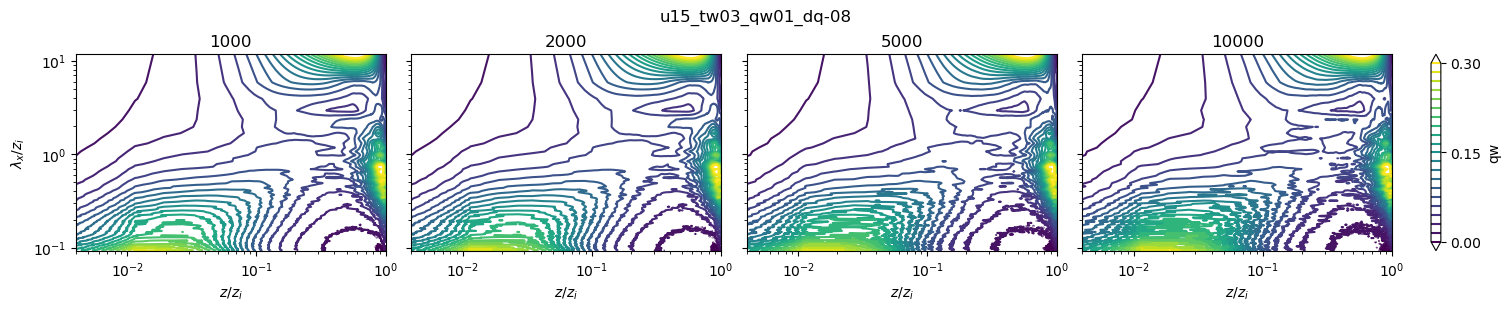

In [10]:
_, _ = plot_spec(d0, sim, t, "uu", "wstar", "wstar", 0, 0.6, figdir)
_, _ = plot_spec(d0, sim, t, "uw", "wstar", "wstar", -0.1, 0.1, figdir)
_, _ = plot_spec(d0, sim, t, "tw", "wstar", "Tstar0", -0.2, 0.2, figdir)
_, _ = plot_spec(d0, sim, t, "qw", "wstar", "Qstar0", 0, 0.3, figdir)

## Integral lengthscales

Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw03_qw01_dq-08/mean_stats_xyt_10000.nc


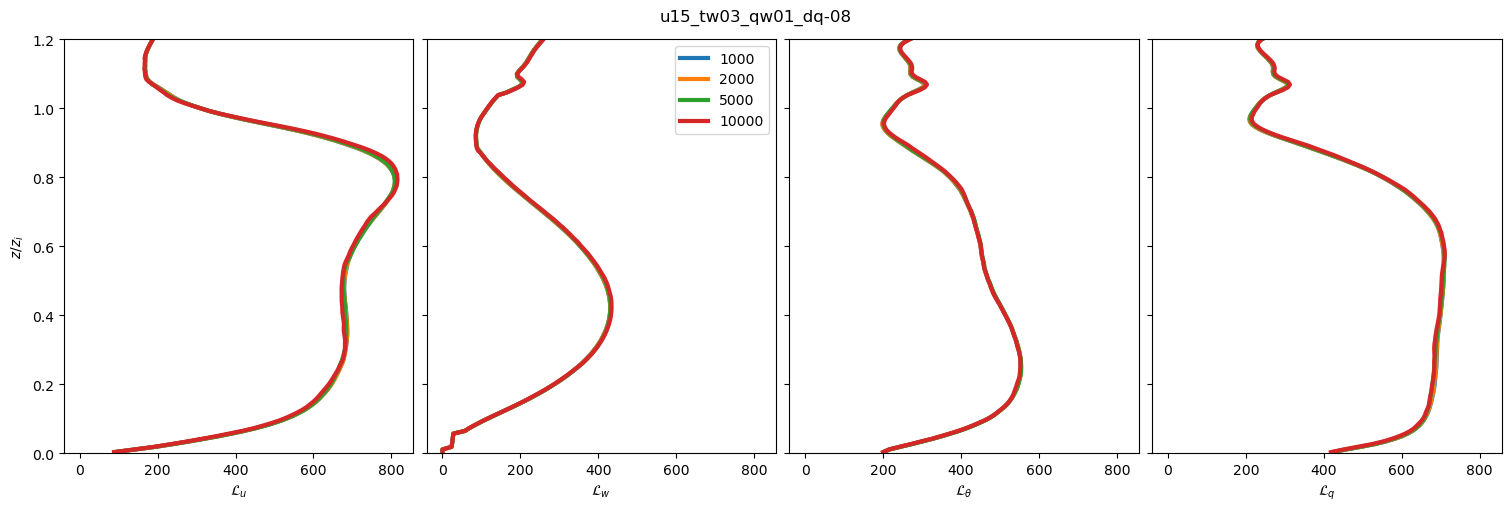

In [11]:
_, _ = plot_L(d0, sim, t, figdir)

# Case 2: u15_tw02_qw01_dq+10

Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_10000.nc


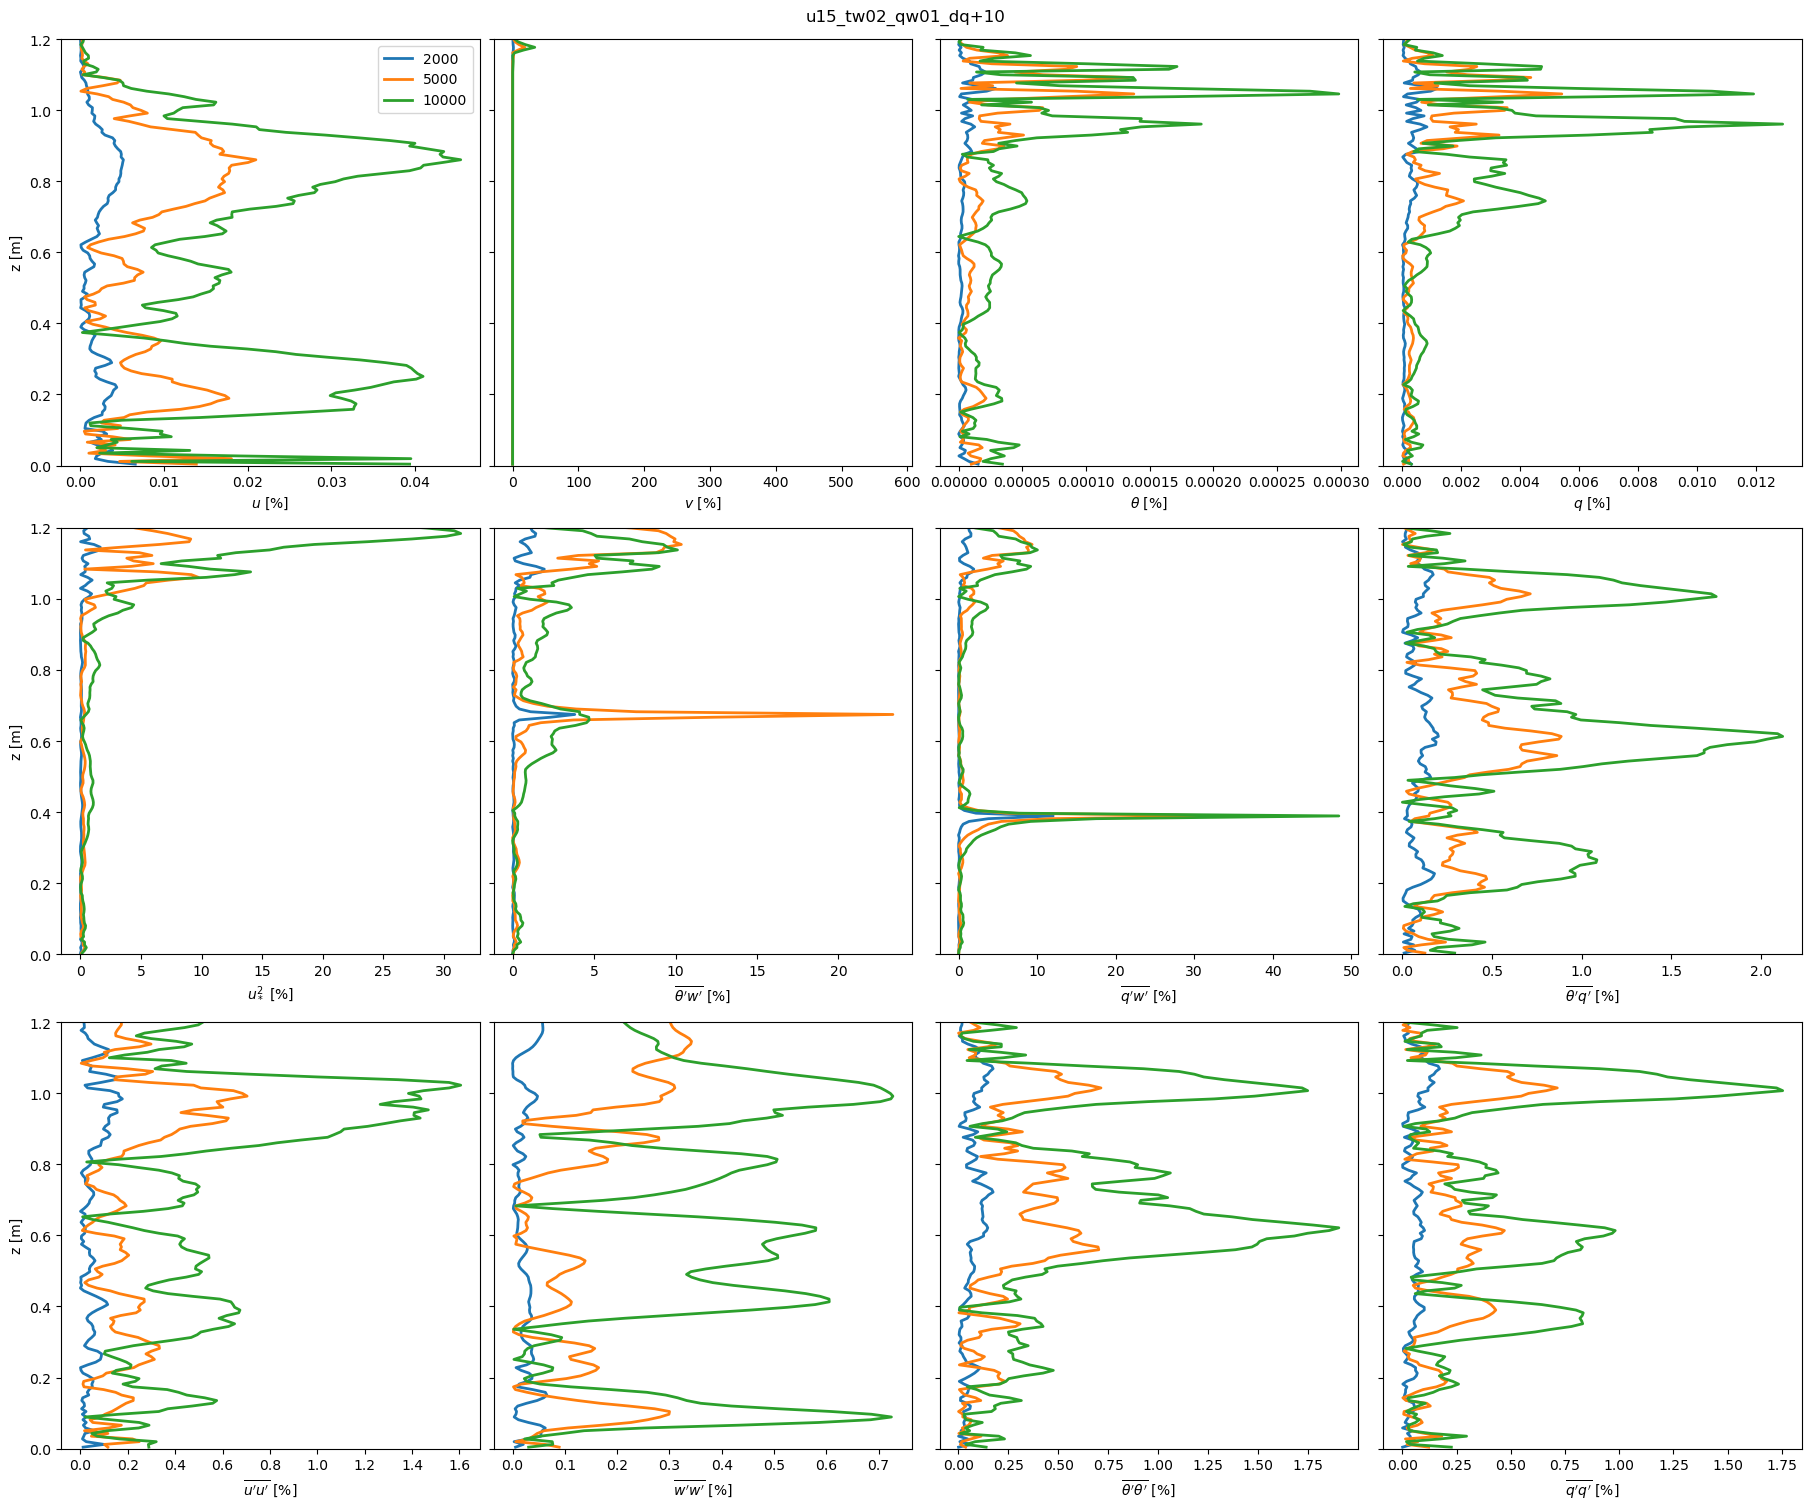

In [12]:
d0 = "/home/bgreene/simulations/CBL/"
sim = "u15_tw02_qw01_dq+10"
t = ["1000", "2000", "5000", "10000"]

fig, ax = plot_pdif(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_10000.nc


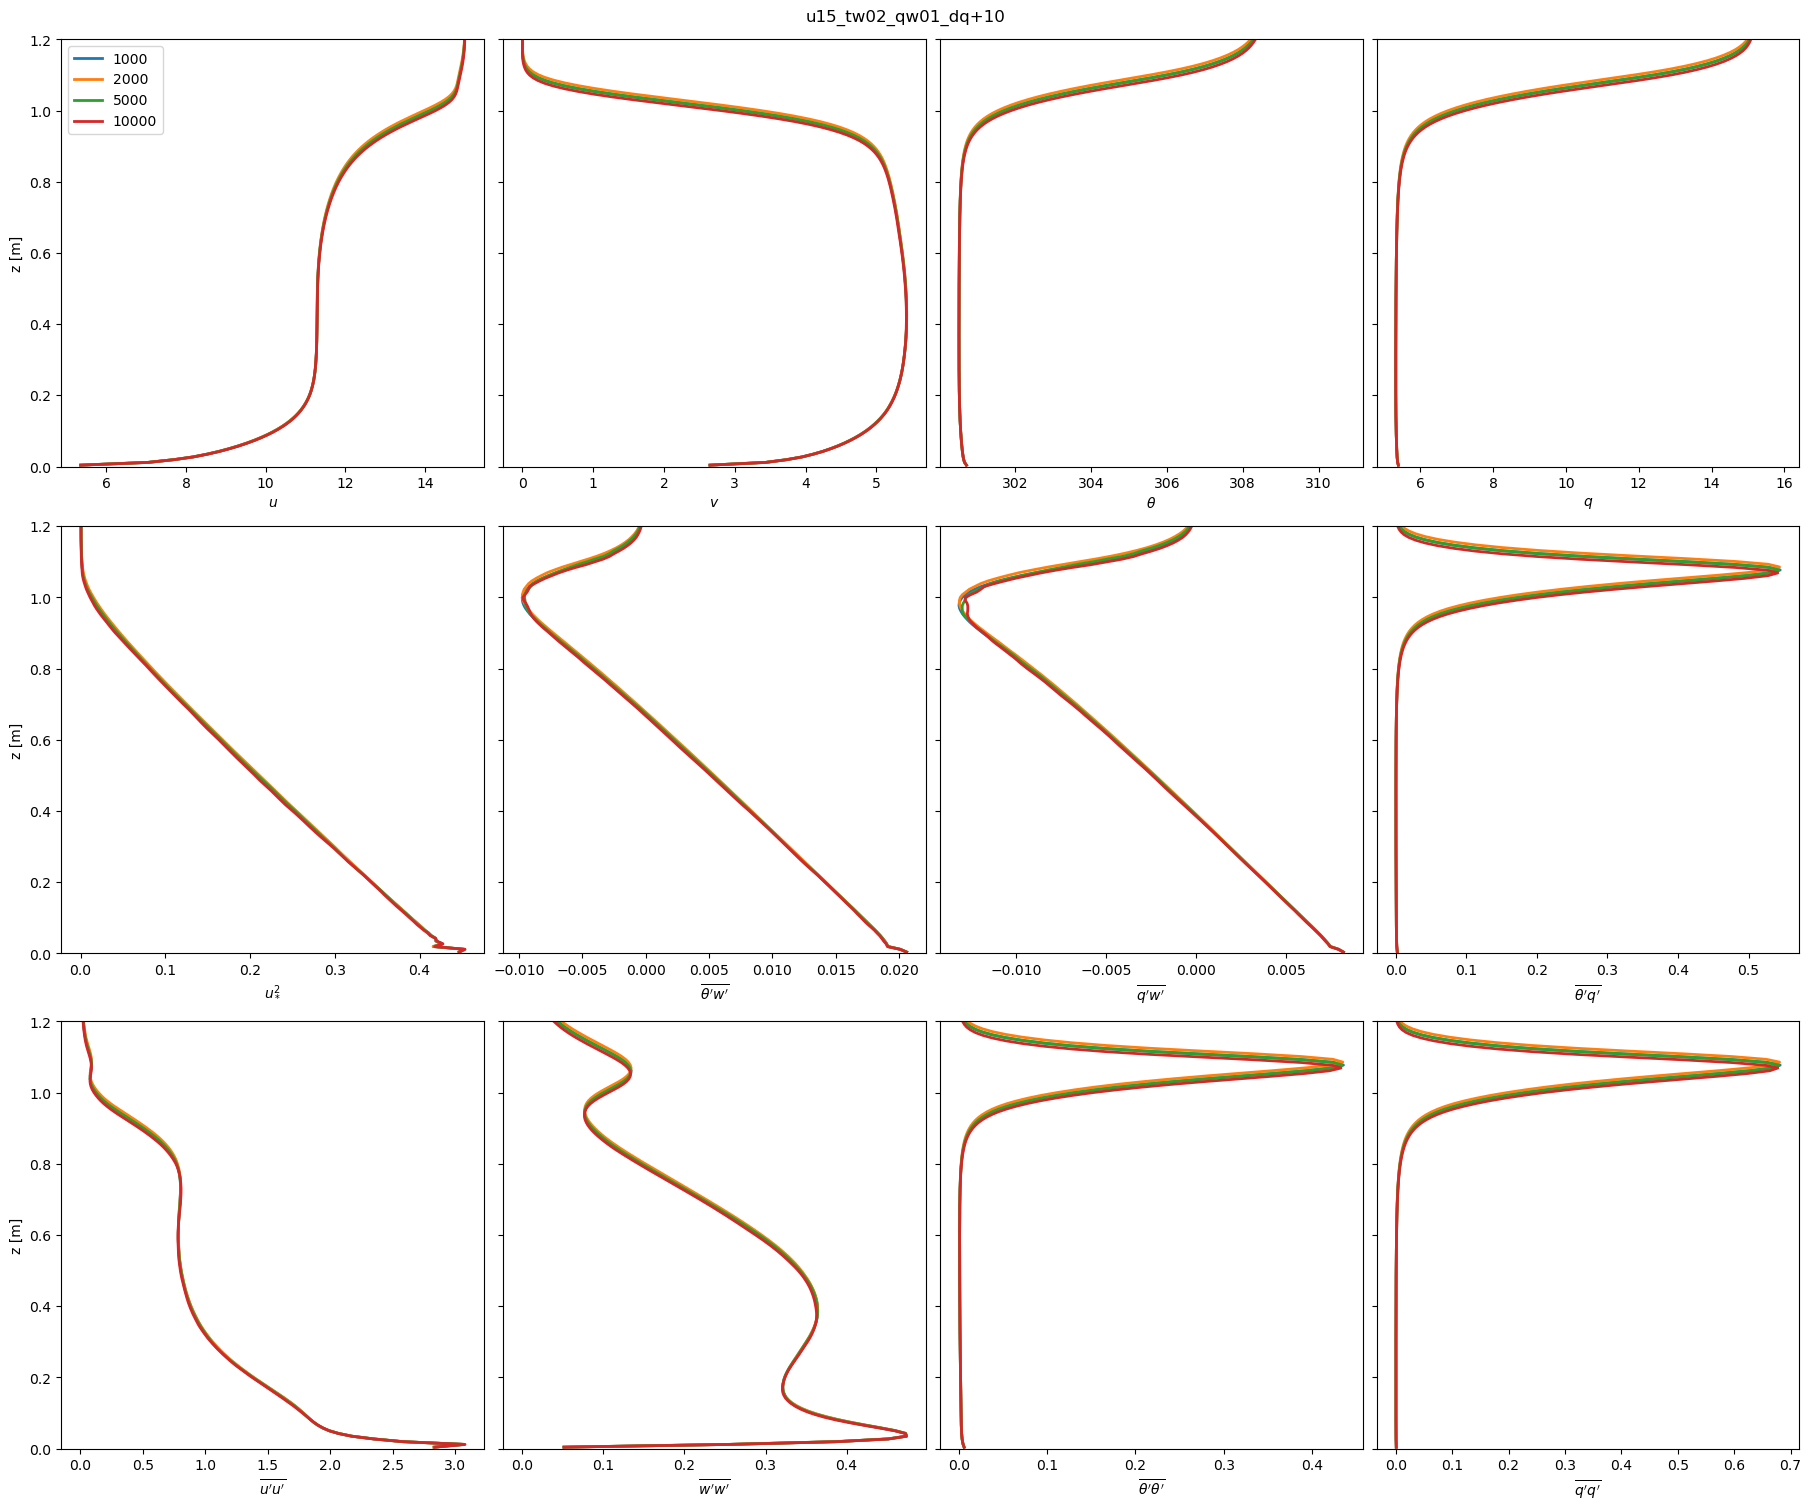

In [13]:
fig, ax = plot_sims(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/C

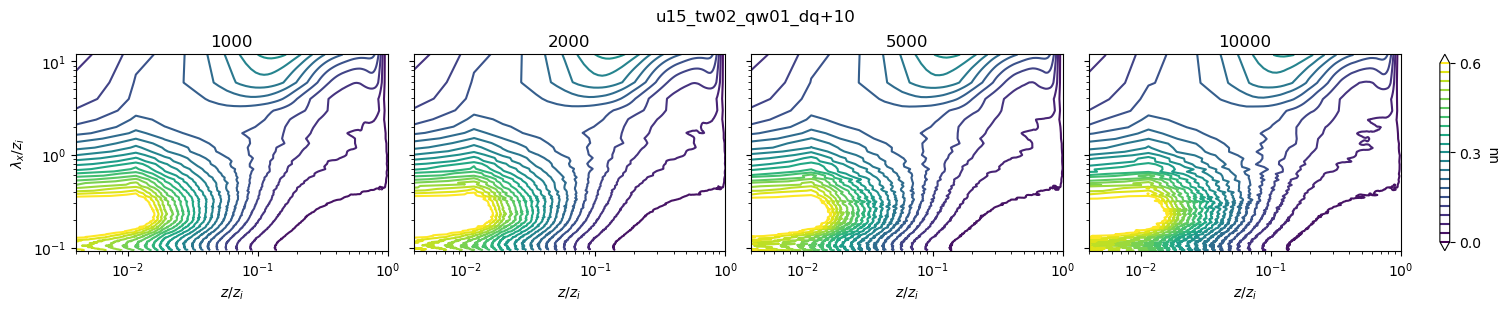

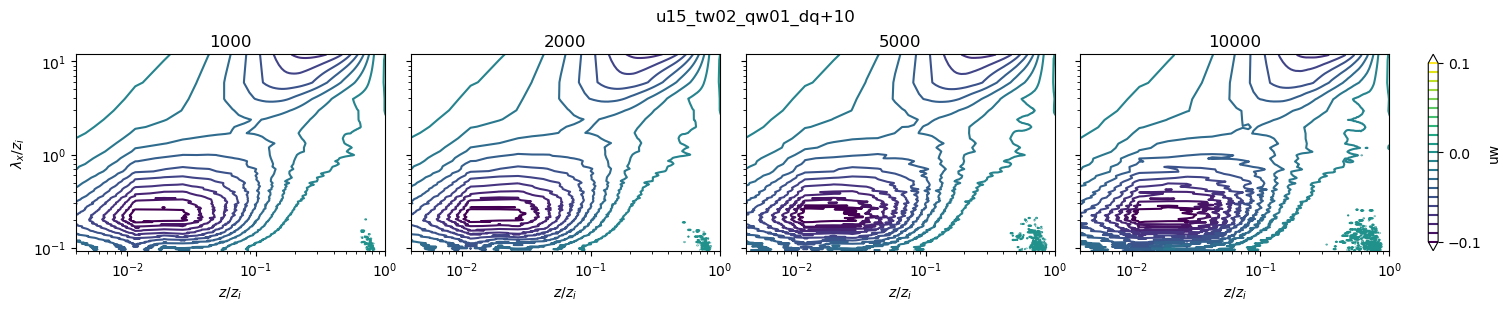

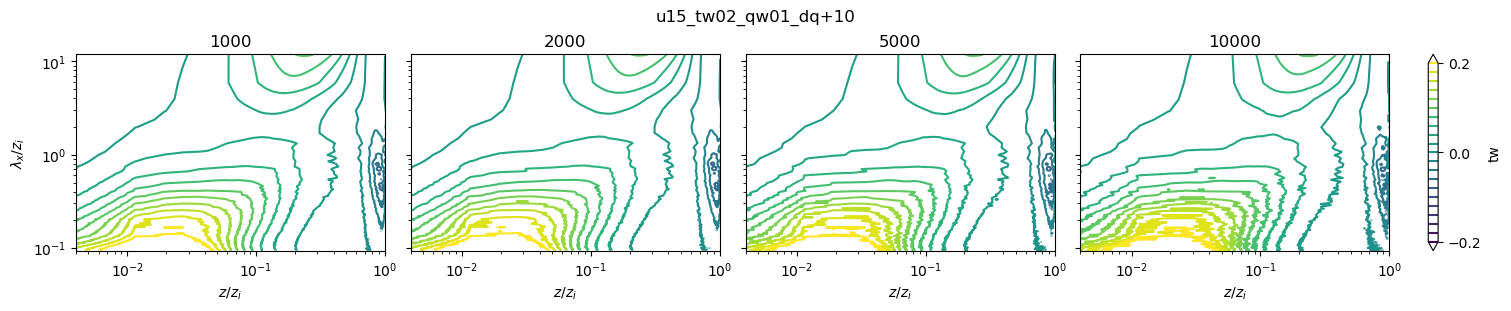

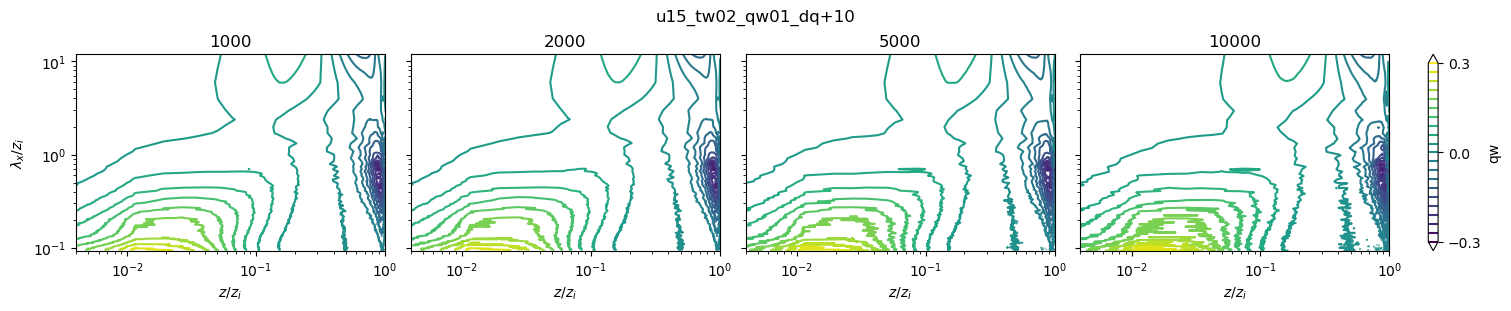

In [14]:
_, _ = plot_spec(d0, sim, t, "uu", "wstar", "wstar", 0, 0.6, figdir)
_, _ = plot_spec(d0, sim, t, "uw", "wstar", "wstar", -0.1, 0.1, figdir)
_, _ = plot_spec(d0, sim, t, "tw", "wstar", "Tstar0", -0.2, 0.2, figdir)
_, _ = plot_spec(d0, sim, t, "qw", "wstar", "Qstar0", -0.3, 0.3, figdir)

Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u15_tw02_qw01_dq+10/mean_stats_xyt_10000.nc


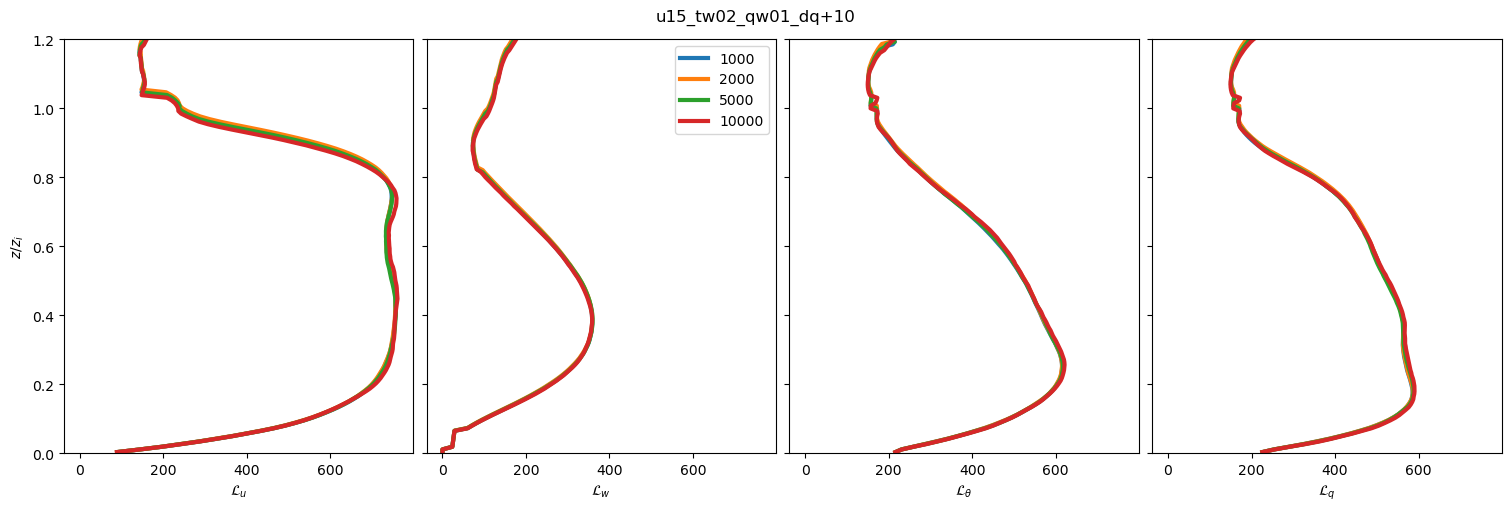

In [15]:
_, _ = plot_L(d0, sim, t, figdir)

# Case 3: u01_tw24_qw10_dq-06

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_10000.nc


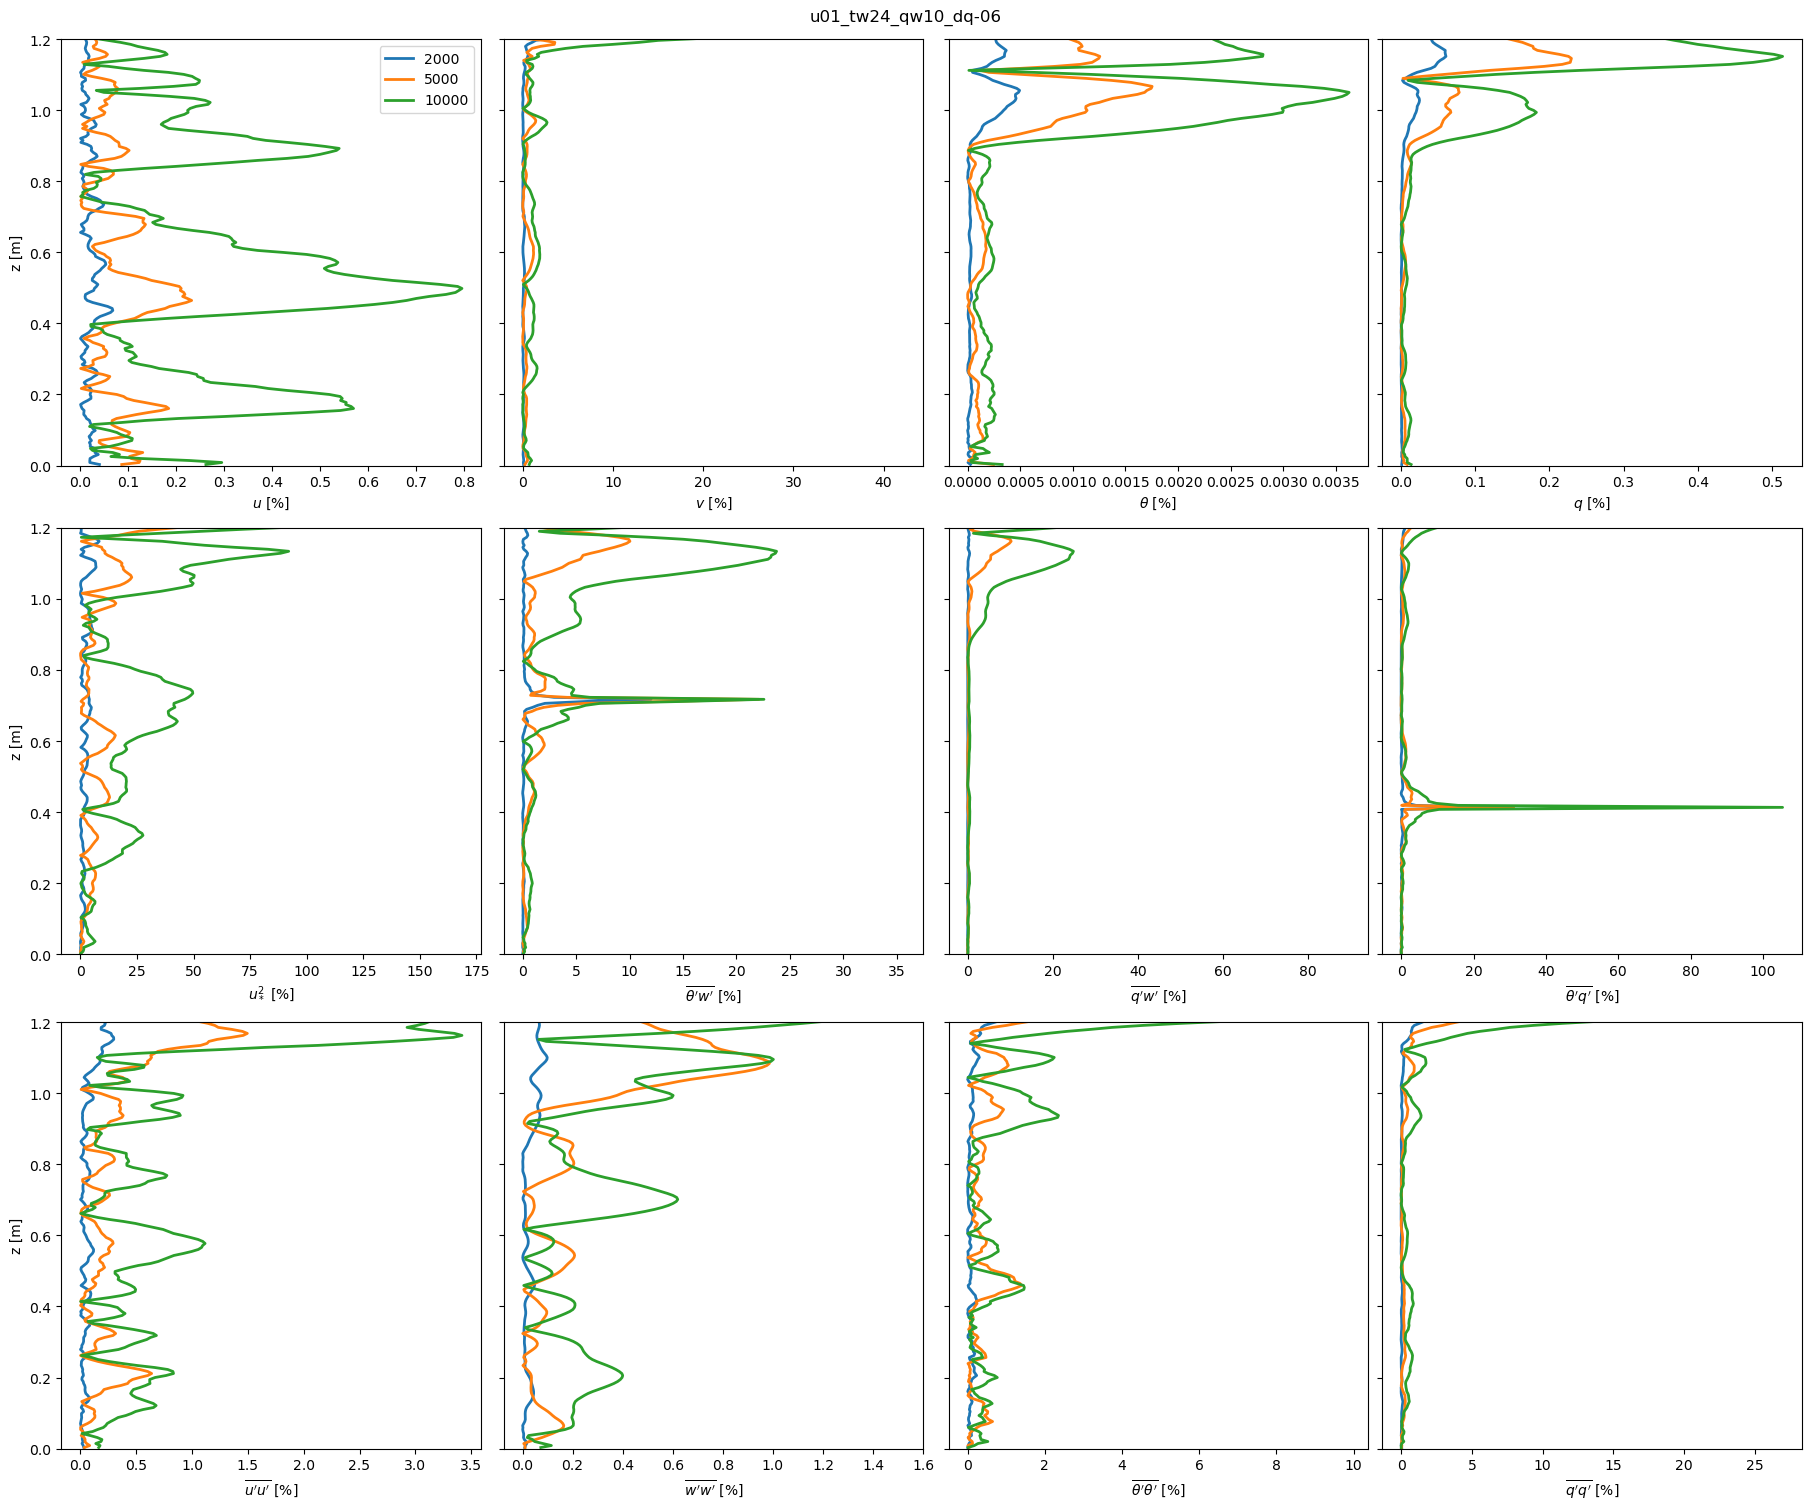

In [16]:
d0 = "/home/bgreene/simulations/CBL/"
sim = "u01_tw24_qw10_dq-06"
t = ["1000", "2000", "5000", "10000"]

fig, ax = plot_pdif(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_10000.nc


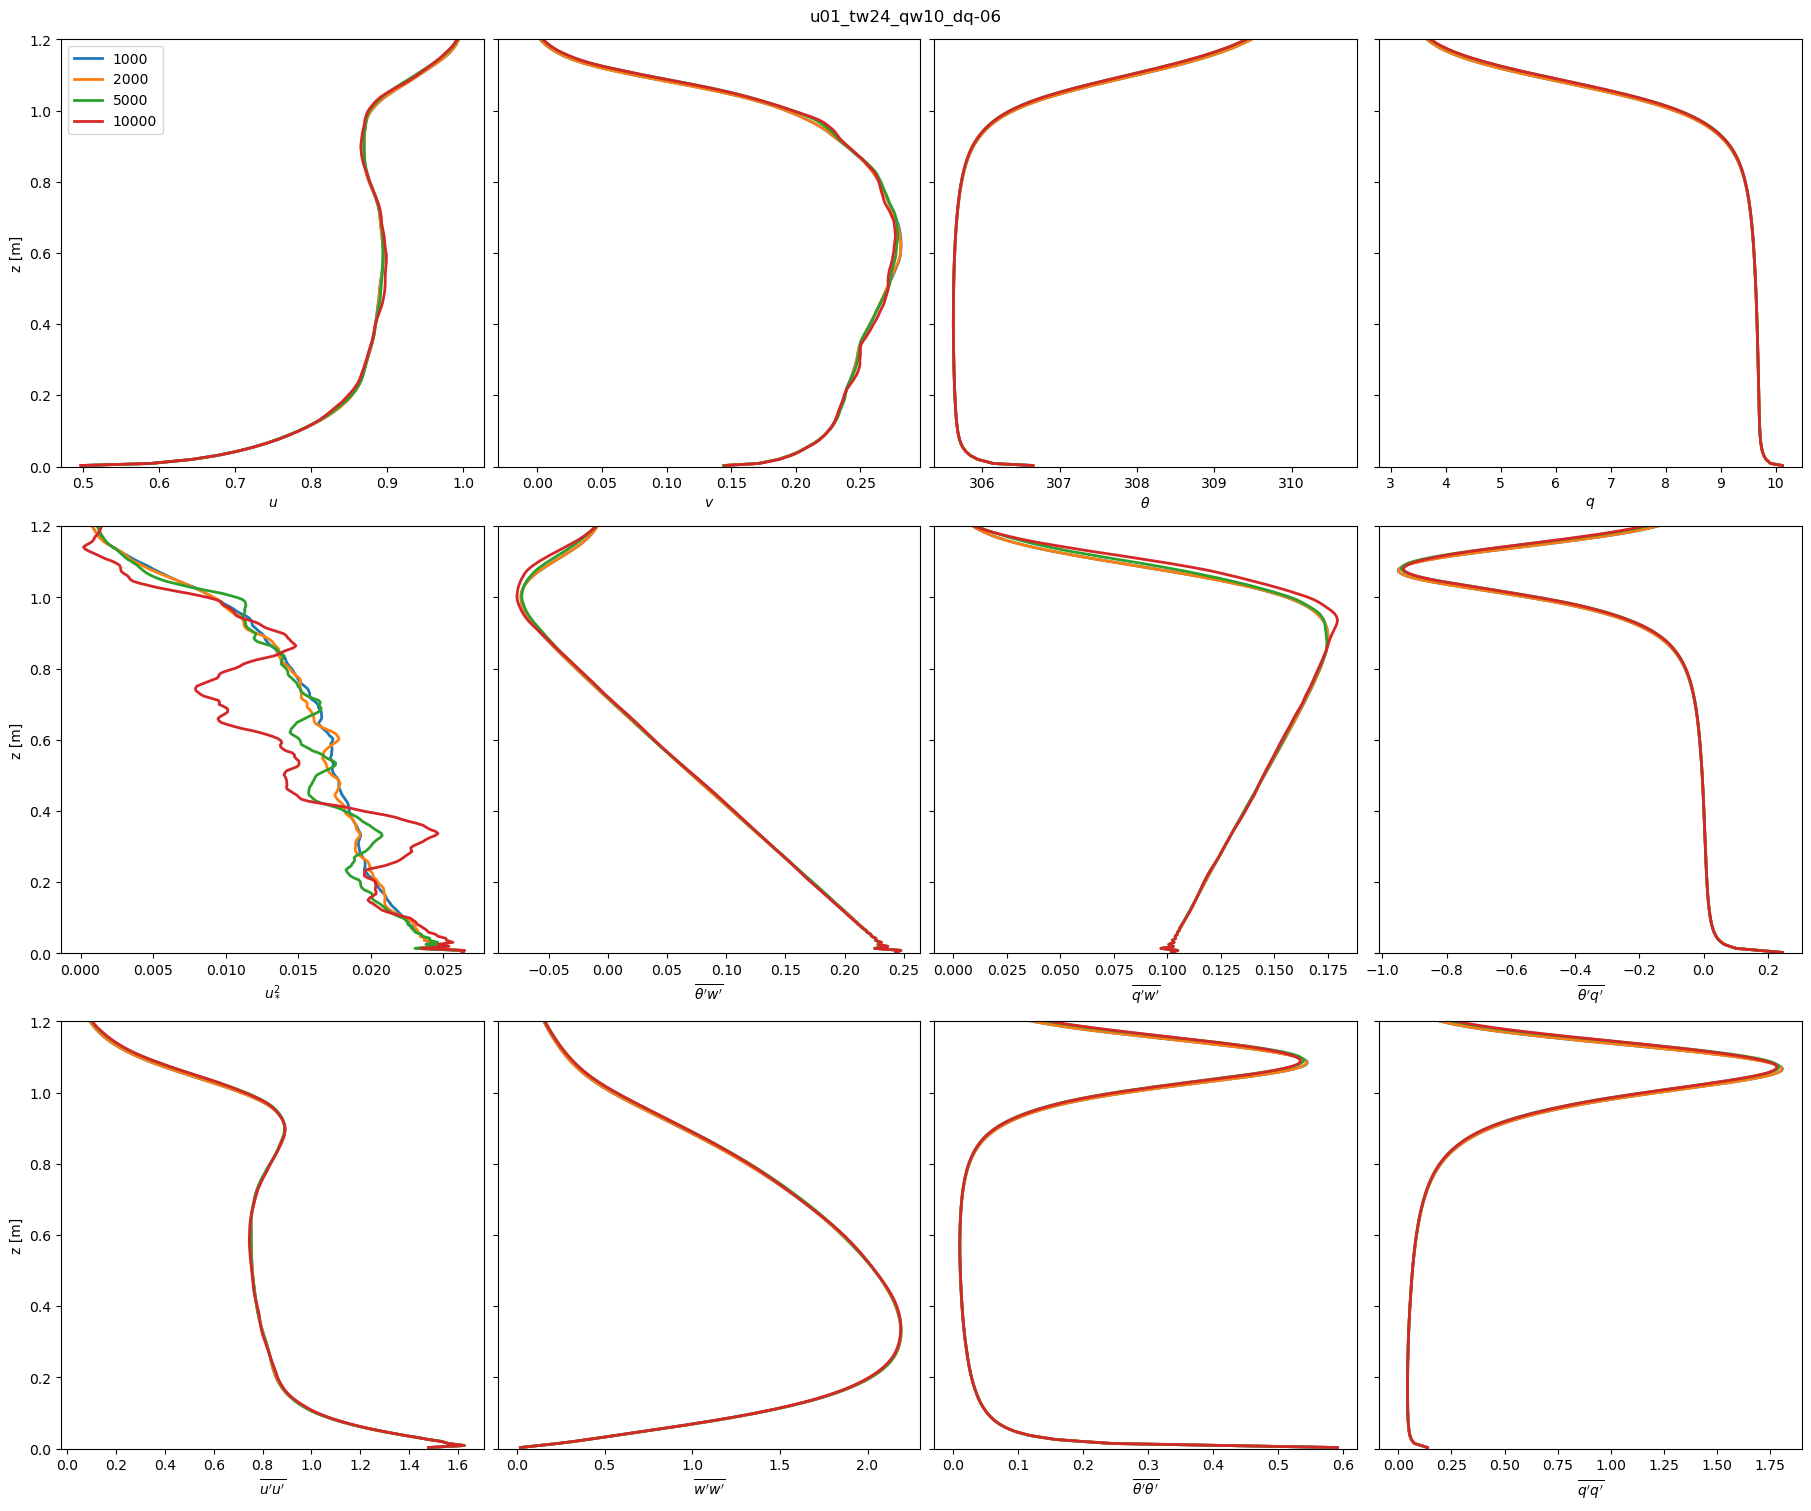

In [17]:
fig, ax = plot_sims(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/C

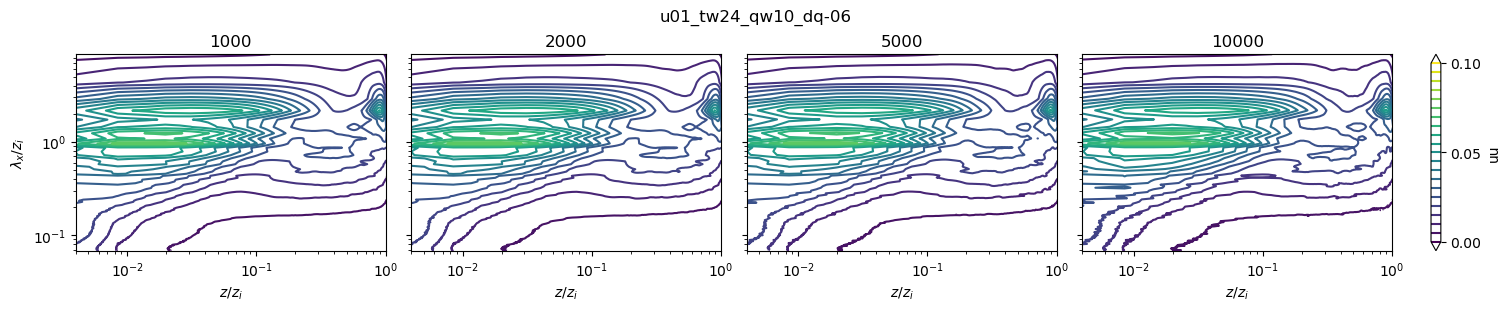

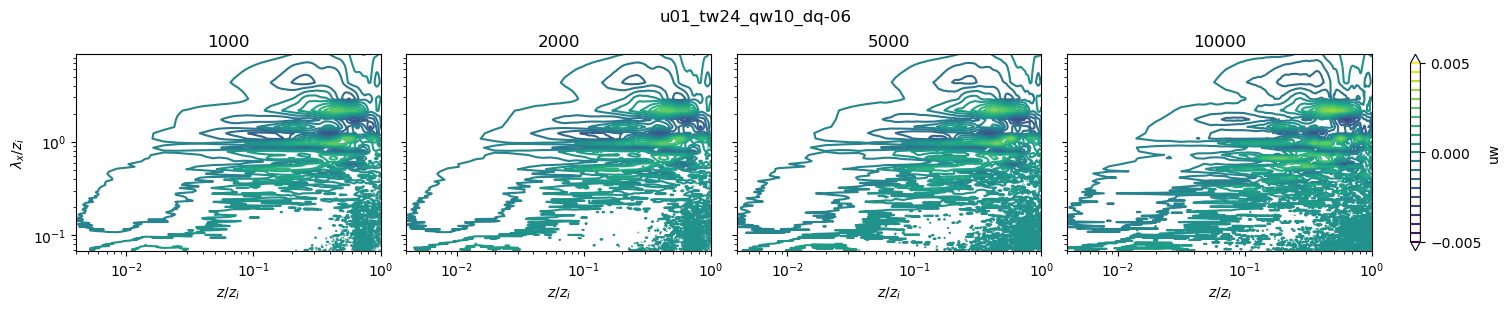

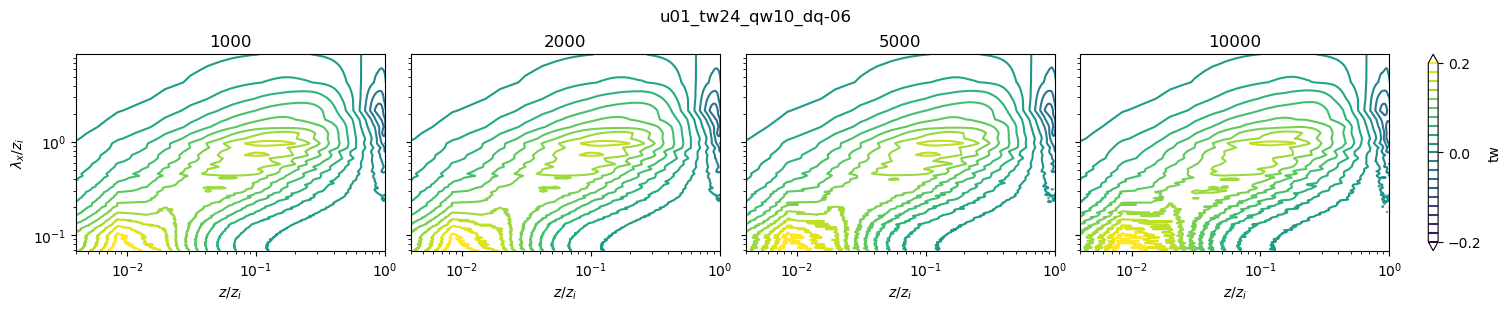

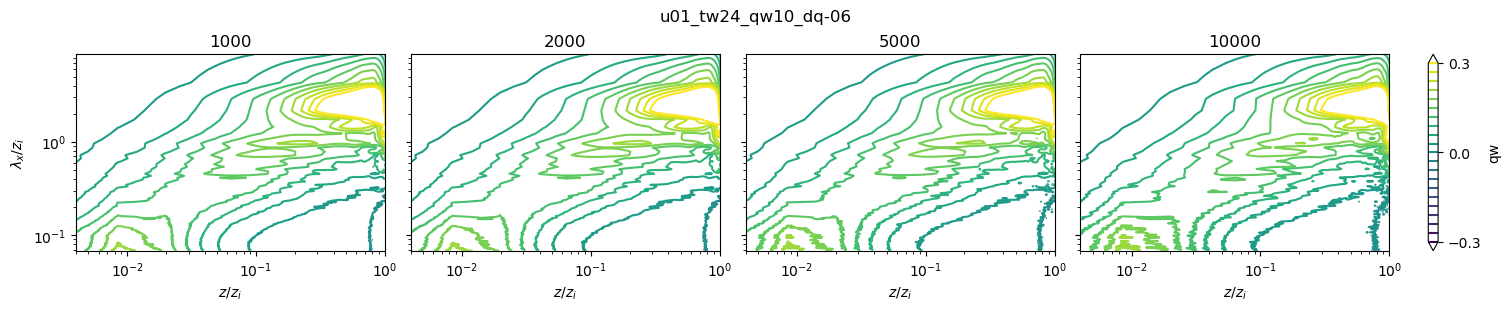

In [18]:
_, _ = plot_spec(d0, sim, t, "uu", "wstar", "wstar", 0, 0.1, figdir)
_, _ = plot_spec(d0, sim, t, "uw", "wstar", "wstar", -0.005, 0.005, figdir)
_, _ = plot_spec(d0, sim, t, "tw", "wstar", "Tstar0", -0.2, 0.2, figdir)
_, _ = plot_spec(d0, sim, t, "qw", "wstar", "Qstar0", -0.3, 0.3, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-06/mean_stats_xyt_10000.nc


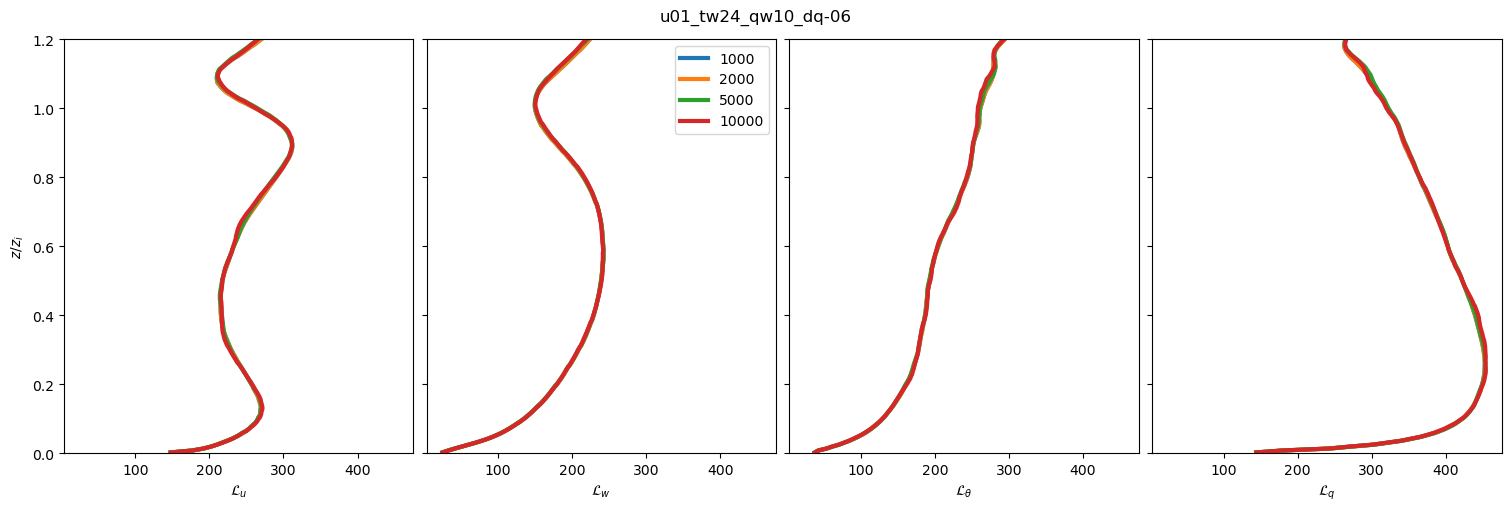

In [19]:
_, _ = plot_L(d0, sim, t, figdir)

# Case 4: u01_tw24_qw10_dq-02

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_10000.nc


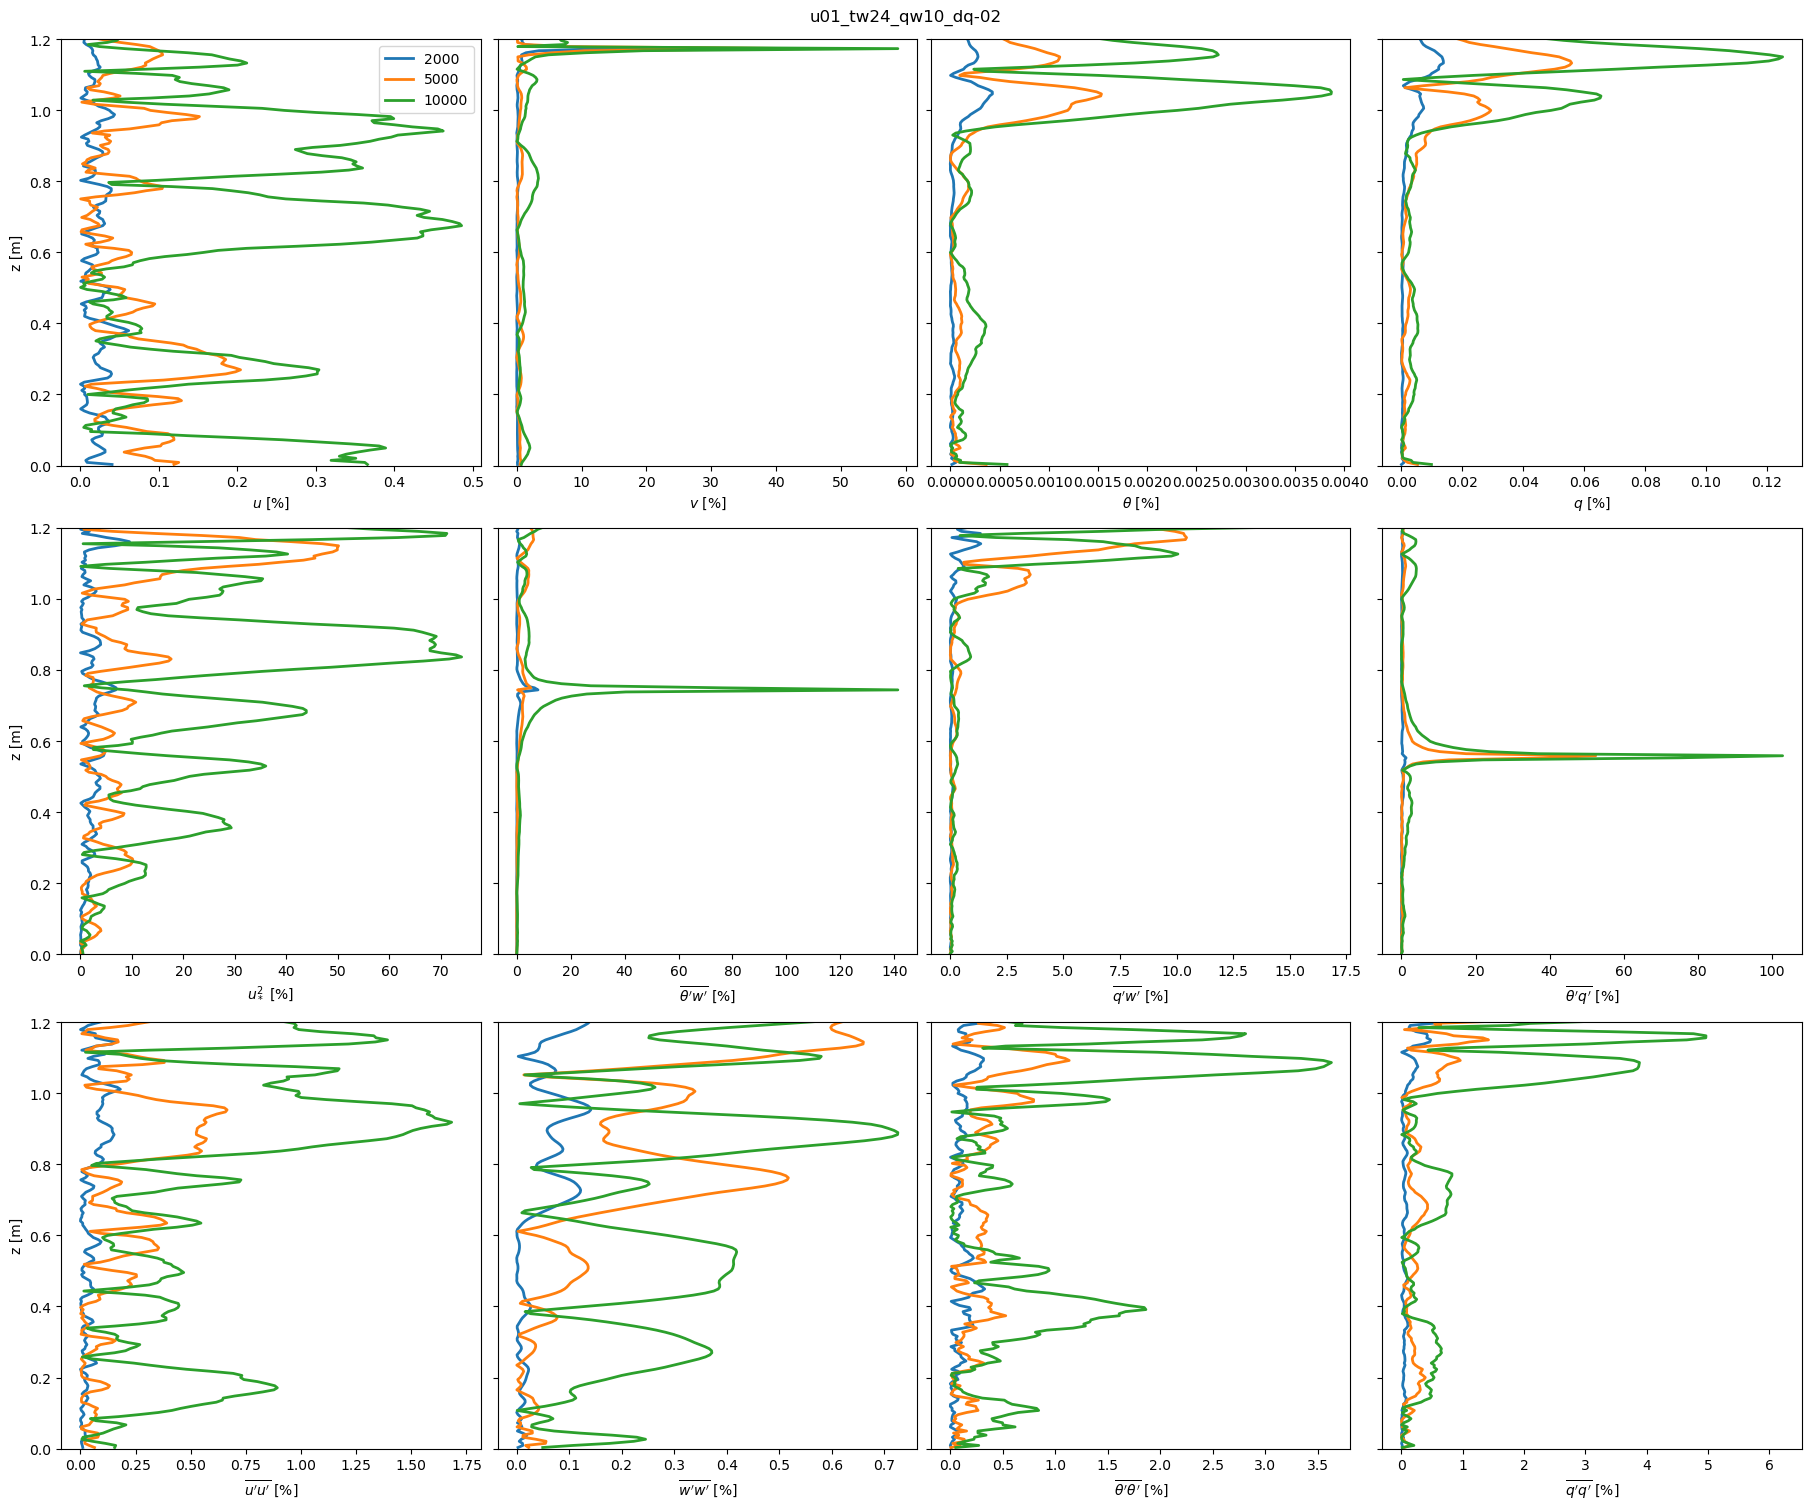

In [20]:
d0 = "/home/bgreene/simulations/CBL/"
sim = "u01_tw24_qw10_dq-02"
t = ["1000", "2000", "5000", "10000"]

fig, ax = plot_pdif(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_10000.nc


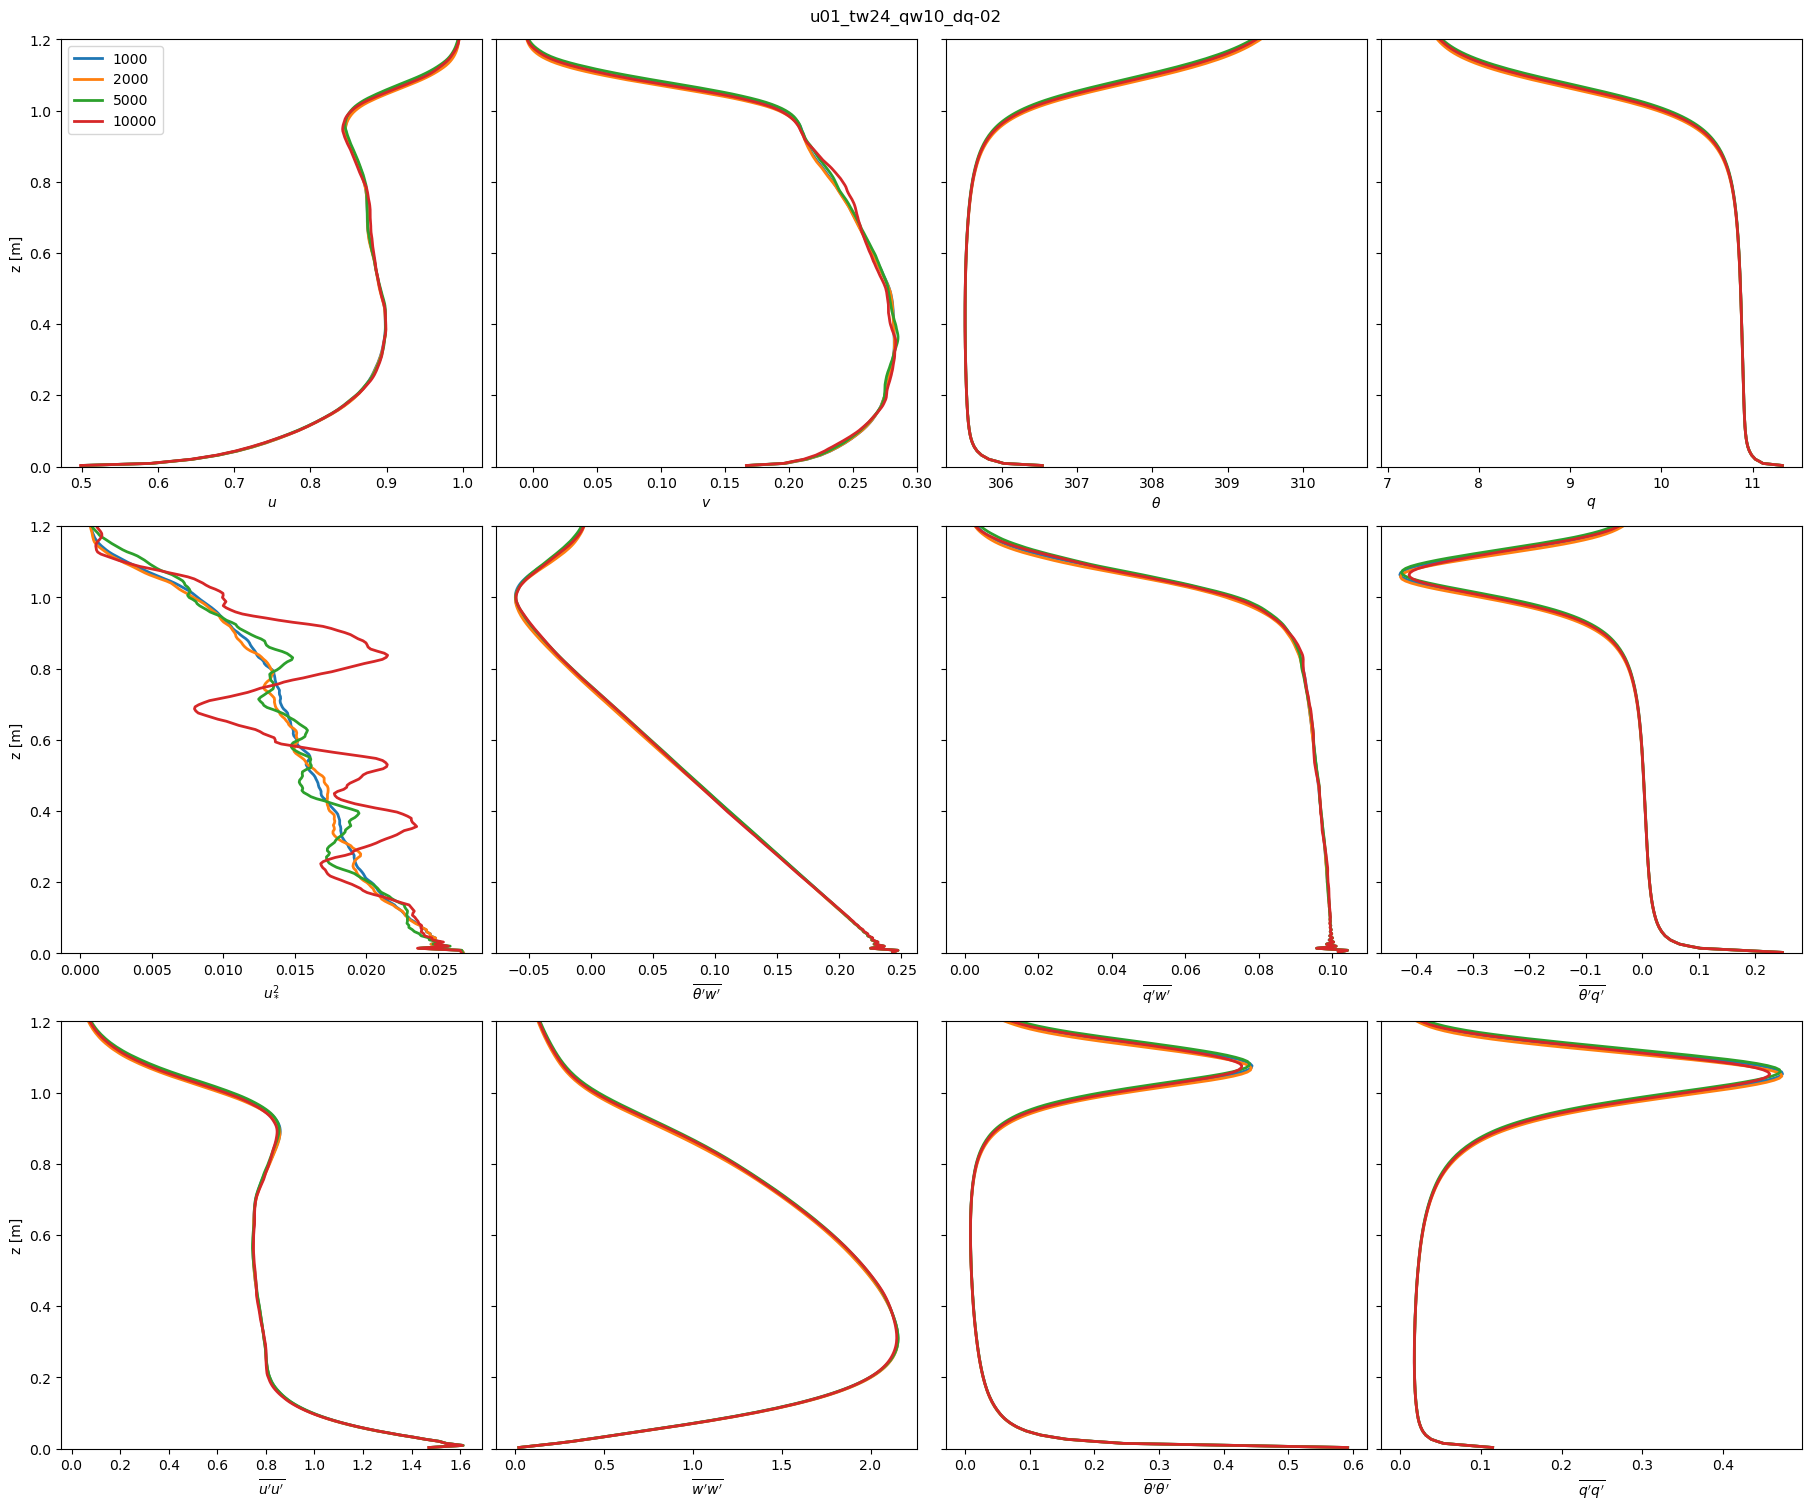

In [21]:
fig, ax = plot_sims(d0, sim, t, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_10000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/C

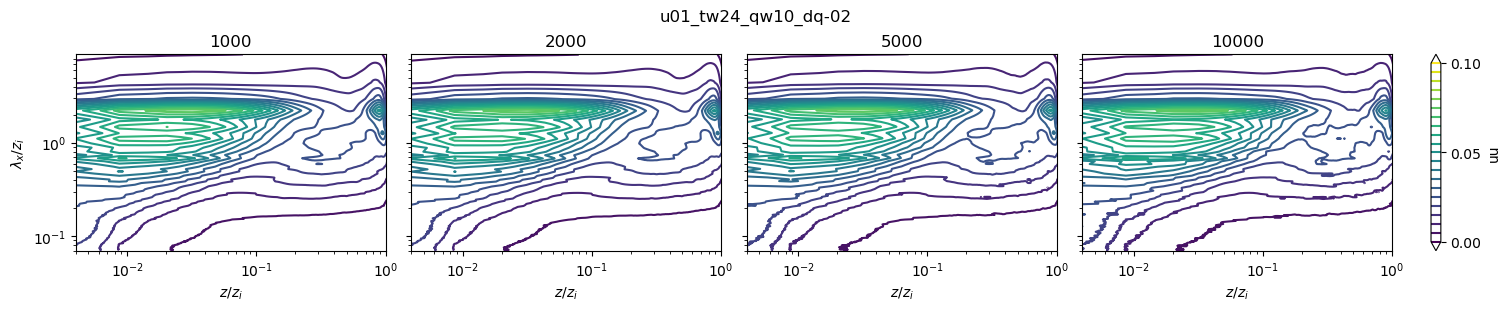

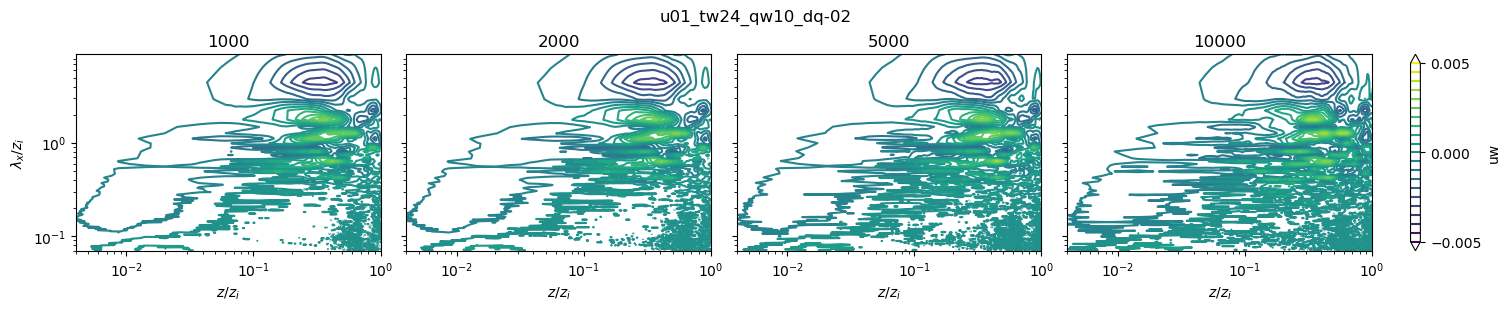

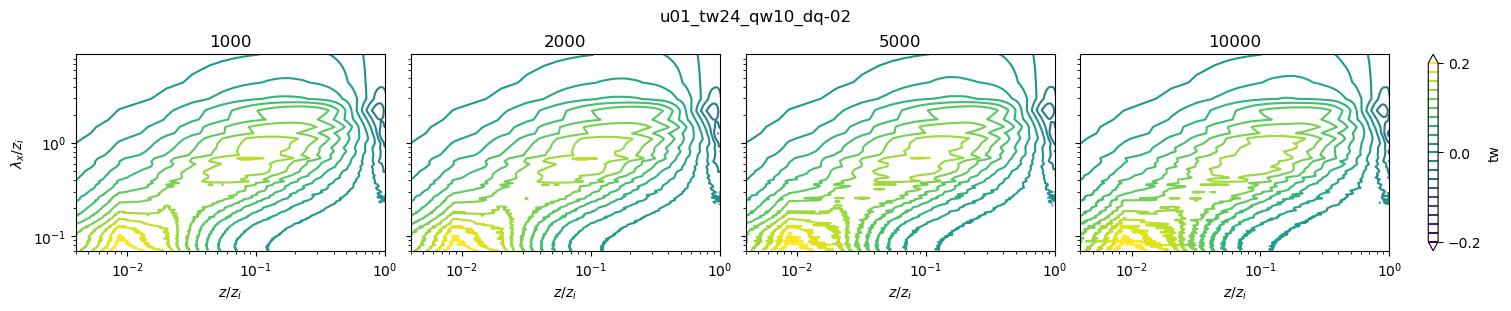

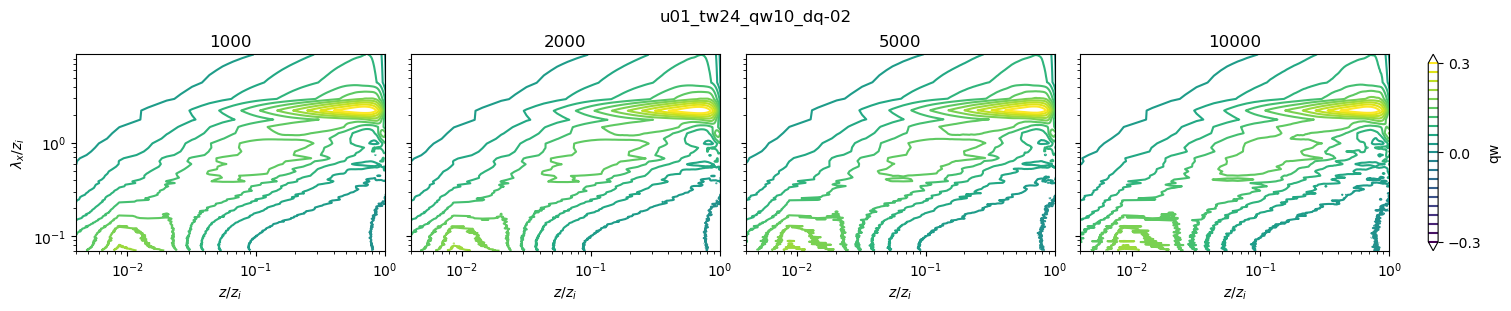

In [22]:
_, _ = plot_spec(d0, sim, t, "uu", "wstar", "wstar", 0, 0.1, figdir)
_, _ = plot_spec(d0, sim, t, "uw", "wstar", "wstar", -0.005, 0.005, figdir)
_, _ = plot_spec(d0, sim, t, "tw", "wstar", "Tstar0", -0.2, 0.2, figdir)
_, _ = plot_spec(d0, sim, t, "qw", "wstar", "Qstar0", -0.3, 0.3, figdir)

Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_1000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_2000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_5000.nc
Reading file: /home/bgreene/simulations/CBL/u01_tw24_qw10_dq-02/mean_stats_xyt_10000.nc


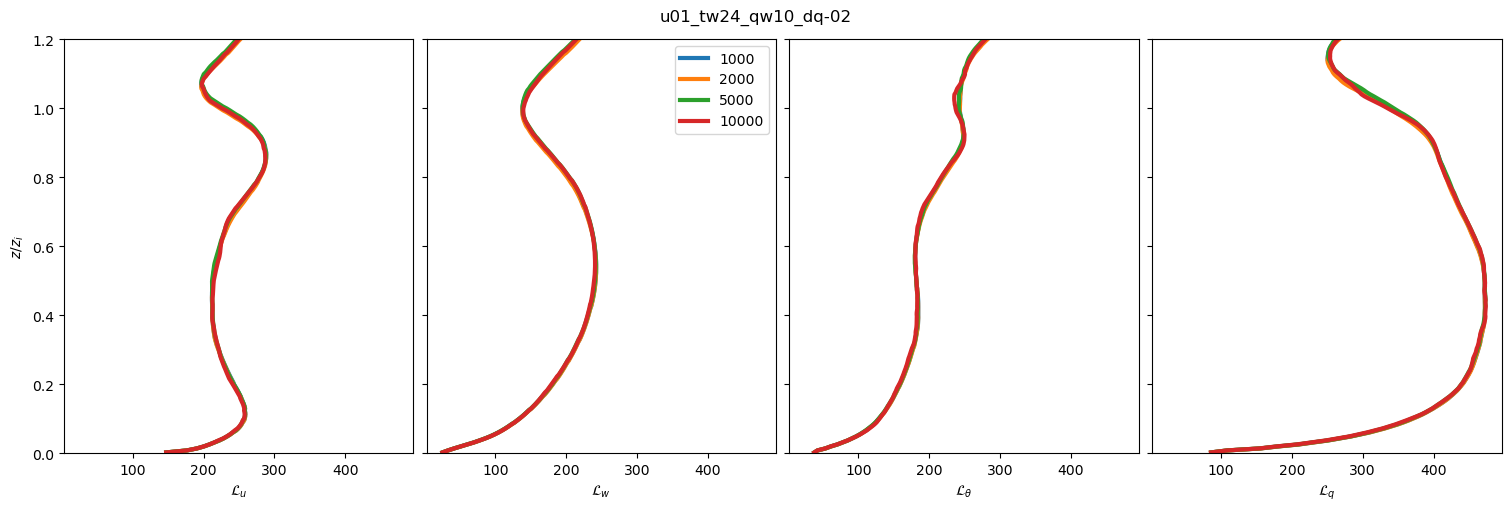

In [23]:
_, _ = plot_L(d0, sim, t, figdir)